# Pós-graduação Lato Sensu em Ciência de Dados e Big Data - PUC MG

## TCC turma 2020 - Gabriel Fonseca da Silva


### Objetivo: desenvolver um algoritmo de machine learning para prever a aprovação de um candidato na prova do ENCCEJA 2019 para obtenção do certificado do ensino fundamental

## Dados utilizados:

### a) Microdados do ENCCEJA Nacional Regular 2019 dos inscritos que fizeram as provas do ensino fundamental

##### https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/encceja

### b) Dados de homicídios por UF do ano de 2019 extraídos do DATASUS (grupo CID10 X85-Y09 e Y35-Y36)
#### http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/ext10uf.def

### c) População por UF estimada extraída do DATASUS (estimativas utilizadas pelo TCU)
#### http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/poptuf.def

### d) Índice de Desenvolvimeno Humano por Estado extraído do Atlas Brasil do IPEA
#### http://www.atlasbrasil.org.br/



## Aplicação: Análise exploratória de dados

### 1) Importando bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

### 2) Análise Exploratória de Dados

In [2]:
# Importando os dados tratados

dados= pd.read_csv("03-dados_tratados\dados_tratados.csv", sep = ',', encoding = "ISO-8859-1")

print("\nDimensões: {0}".format(dados.shape))
print("\nCampos: {0}".format(dados.keys()))



Dimensões: (144757, 27)

Campos: Index(['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'SG_UF_PROVA', 'IN_APROVADO_LC',
       'IN_APROVADO_CN', 'IN_APROVADO_CH', 'IN_APROVADO_MT', 'Q01', 'Q02',
       'Q03', 'Q04', 'Q05', 'Q06', 'Q07', 'Q08', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q31', 'homicidios', 'Populacao', 'taxapor100mil', 'idhm_2017', 'y',
       'target'],
      dtype='object')


#### 2.1) Análise da variável target 

In [3]:
# Frequencias do atributo target

dados['target'].value_counts()

tab1 = pd.value_counts(dados['target']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tab1['%'] = round(100*pd.value_counts(dados['target']) / len(dados['target']),1)
tab1_total = pd.DataFrame(np.array(tab1.sum()).reshape(1,2), index=['Total'], columns=tab1.columns)
tab1_total['Candidatos'] =int(tab1_total['Candidatos'])
tabela1 = tab1.append(tab1_total)
print("Distribuição de frequências do atributo target")
tabela1.to_excel('tabelas/tabela01.xlsx',index=True,index_label='Situação')
tabela1

Distribuição de frequências do atributo target


Candidatos      %
Aprovado        63859   44.1
Reprovado       80898   55.9
Total          144757  100.0

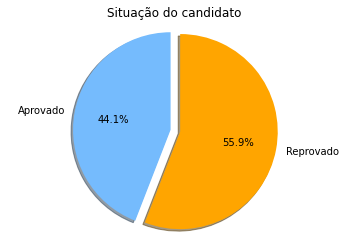

In [4]:
# Gráfico do atributo target

labels_tab1 = 'Aprovado','Reprovado'
sizes_tab1 = tab1['%']
explode_tab1 = (0, 0.1)

colors_tab1 = ['xkcd:sky blue','orange']

fig_tab1, ax_tab1 = plt.subplots()
ax_tab1.pie(sizes_tab1, explode=explode_tab1, labels=labels_tab1,colors=colors_tab1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_tab1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax_tab1.set_title("Situação do candidato")
plt.savefig('graficos/situacao.png', format='png')
plt.show()

#### 2.2) Análise do atributo idade do candidato

In [5]:
# Visualizando as estatísticas principais

round(dados['NU_IDADE'].describe(),2)

count    144757.00
mean         31.55
std          12.54
min          15.00
25%          20.00
50%          30.00
75%          41.00
max          89.00
Name: NU_IDADE, dtype: float64

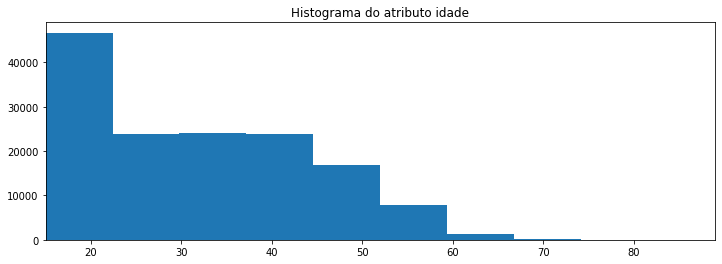

In [6]:
# Histograma do atributo idade

fig, ax = plt.subplots(figsize=(12,4))

ax.hist(dados['NU_IDADE'])
ax.set_title("Histograma do atributo idade")
ax.set_xlim((min(dados['NU_IDADE']), max(dados['NU_IDADE'])))
plt.savefig('graficos/hist_idade.png', format='png')


In [7]:
# Verificando classes de frequências

print(pd.qcut(dados['NU_IDADE'], q=4).value_counts(sort=False))

(14.999, 20.0]    39524
(20.0, 30.0]      34038
(30.0, 41.0]      35064
(41.0, 89.0]      36131
Name: NU_IDADE, dtype: int64


In [8]:
# Passando os labels

label_faixa_etaria = ['A-Até 20','B-De 21 a 30','C-De 31 a 41','D-42 e mais']


# Criando a variável categorizada

dados['faixa_etaria']=pd.qcut(dados['NU_IDADE'], q=4, labels=label_faixa_etaria)


In [9]:
# Criando a tabela de distribuição de frequências

tab2 = pd.value_counts(dados['faixa_etaria']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tab2['%'] = round(100*pd.value_counts(dados['faixa_etaria']) / len(dados['faixa_etaria']),1)
tab2_total = pd.DataFrame(np.array(tab2.sum()).reshape(1,2), index=['Total'], columns=tab2.columns)
tab2_total['Candidatos'] =int(tab2_total['Candidatos'])
tab2_tabela = tab2.append(tab2_total)

print("Distribuição do número de candidatos \n segundo a faixa etária")
tab2_tabela.to_excel('tabelas/tabela02.xlsx',index=True,index_label='Faixa etária')
tab2_tabela

Distribuição do número de candidatos 
 segundo a faixa etária


Candidatos      %
A-Até 20           39524   27.3
B-De 21 a 30       34038   23.5
C-De 31 a 41       35064   24.2
D-42 e mais        36131   25.0
Total             144757  100.0

In [10]:
# Criando a tabela cruzada target vs faixaetária

cros_tab2=pd.crosstab(dados['faixa_etaria'],dados['target'], 
                      margins=True, margins_name='Total', rownames=['Faixa etária'],colnames=['Situação:'])

cros_tab2['% Aprovado']=round(100*(cros_tab2['Aprovado']/cros_tab2['Total']),1)
cros_tab2['% Reprovado']=round(100*(cros_tab2['Reprovado']/cros_tab2['Total']),1)

cros_tab2["% Total"]=100*round((cros_tab2["Total"]/len(dados)),3)
cros_tab2 = cros_tab2[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]


print('Situação do candidato por faixa etária')
cros_tab2.to_excel('tabelas/tabela02a.xlsx',index=True,index_label='Faixa etária')
cros_tab2

Situação do candidato por faixa etária


Situação:     Aprovado  Reprovado  % Aprovado  % Reprovado   Total  % Total
Faixa etária                                                               
A-Até 20         13540      25984        34.3         65.7   39524     27.3
B-De 21 a 30     16314      17724        47.9         52.1   34038     23.5
C-De 31 a 41     17151      17913        48.9         51.1   35064     24.2
D-42 e mais      16854      19277        46.6         53.4   36131     25.0
Total            63859      80898        44.1         55.9  144757    100.0

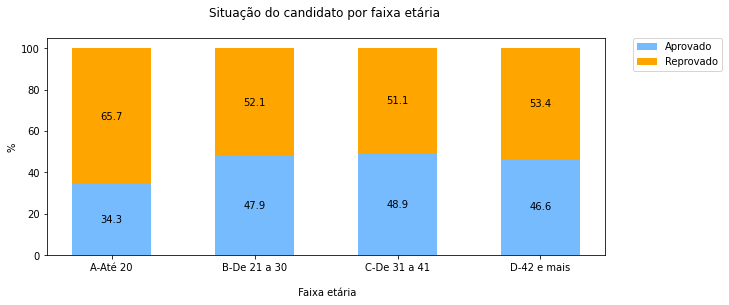

In [11]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = label_faixa_etaria

N = len(labels)

aprovados_tab2=cros_tab2['% Aprovado'].head(len(cros_tab2['% Aprovado'])-1)
reprovados_tab2=cros_tab2['% Reprovado'].head(len(cros_tab2['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tab2, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tab2, width,
            bottom=aprovados_tab2, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato por faixa etária \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Faixa etária')
plt.savefig('graficos/faixa_etaria.png', format='png')
plt.show()

In [12]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tab2['Aprovado'], cros_tab2['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2179.99
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2212.71
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.3) Análise do atributo taxa de homicídios por 100 mil habitantes

In [13]:
# Visualizando as estatísticas principais

round(dados['taxapor100mil'].describe(),2)

count    144757.00
mean         20.91
std          10.19
min           7.32
25%          13.67
50%          18.32
75%          25.69
max          42.68
Name: taxapor100mil, dtype: float64

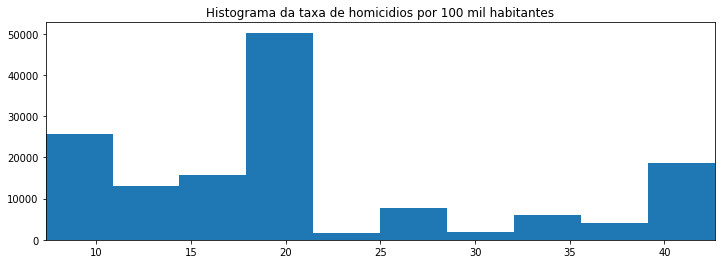

In [14]:
# Histograma da taxa de homicidios por 100 mil habitantes

fig, ax = plt.subplots(figsize=(12,4))

ax.hist(dados['taxapor100mil'])
ax.set_title("Histograma da taxa de homicidios por 100 mil habitantes")
ax.set_xlim((min(dados['taxapor100mil']), max(dados['taxapor100mil'])))
plt.savefig('graficos/hist_taxahomicidios.png', format='png')

In [15]:
# Verificando classes de frequências

print(pd.qcut(dados['taxapor100mil'], q=4).value_counts(sort=False))

(7.319, 13.67]    38840
(13.67, 18.32]    34702
(18.32, 25.69]    36163
(25.69, 42.68]    35052
Name: taxapor100mil, dtype: int64


In [16]:
# Passando os labels

label_homicidio = ['A-De 7,3 a 13,7','B-Acima de 13,7 a 18,3','C-Acima de 18,3 a 25,9','D-Acima de 25,9']


# Criando a variável categorizada

dados['taxapor100milcat']=pd.qcut(dados['taxapor100mil'], q=4, labels=label_homicidio)

In [17]:
# Criando a tabela de distribuição de frequências

tab3 = pd.value_counts(dados['taxapor100milcat']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tab3['%'] = round(100*pd.value_counts(dados['taxapor100milcat']) / len(dados['taxapor100milcat']),3)
tab3_total = pd.DataFrame(np.array(tab3.sum()).reshape(1,2), index=['Total'], columns=tab3.columns)
tab3_total['Candidatos'] =int(tab3_total['Candidatos'])
tab3_tabela = tab3.append(tab3_total)
print("Distribuição do número de candidatos segundo a \n taxa de homicídios por 100 mil habitantes")
tab3_tabela.to_excel('tabelas/tabela03.xlsx',index=True,index_label='Taxa de Homicídios')
tab3_tabela


Distribuição do número de candidatos segundo a 
 taxa de homicídios por 100 mil habitantes


Candidatos        %
A-De 7,3 a 13,7              38840   26.831
B-Acima de 13,7 a 18,3       34702   23.973
C-Acima de 18,3 a 25,9       36163   24.982
D-Acima de 25,9              35052   24.214
Total                       144757  100.000

In [18]:
# Criando a tabela cruzada target vs taxa de homicídios

cros_tab3=pd.crosstab(dados['taxapor100milcat'],dados['target'], margins=True,
                      margins_name='Total',rownames=['Taxa de homicídios'],colnames=['Situação:'])

cros_tab3['% Aprovado']=round(100*(cros_tab3['Aprovado']/cros_tab3['Total']),1)
cros_tab3['% Reprovado']=round(100*(cros_tab3['Reprovado']/cros_tab3['Total']),1)

cros_tab3["% Total"]=100*round((cros_tab3["Total"]/len(dados)),3)
cros_tab3 = cros_tab3[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]


print('Situação do candidato segundo a taxa de homicídios por 100 mil habitantes')
cros_tab3.to_excel('tabelas/tabela03a.xlsx',index=True,index_label='Taxa de Homicídios')
cros_tab3

Situação do candidato segundo a taxa de homicídios por 100 mil habitantes


Situação:               Aprovado  Reprovado  % Aprovado  % Reprovado   Total  \
Taxa de homicídios                                                             
A-De 7,3 a 13,7            19920      18920        51.3         48.7   38840   
B-Acima de 13,7 a 18,3     15095      19607        43.5         56.5   34702   
C-Acima de 18,3 a 25,9     16690      19473        46.2         53.8   36163   
D-Acima de 25,9            12154      22898        34.7         65.3   35052   
Total                      63859      80898        44.1         55.9  144757   

Situação:               % Total  
Taxa de homicídios               
A-De 7,3 a 13,7            26.8  
B-Acima de 13,7 a 18,3     24.0  
C-Acima de 18,3 a 25,9     25.0  
D-Acima de 25,9            24.2  
Total                     100.0

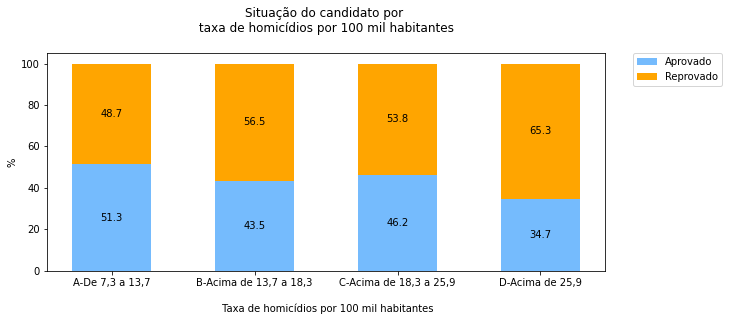

In [19]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

N = len(labels)

labels = label_homicidio
aprovados_tab3=cros_tab3['% Aprovado'].head(len(cros_tab3['% Aprovado'])-1)
reprovados_tab3=cros_tab3['% Reprovado'].head(len(cros_tab3['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tab3, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tab3, width,
            bottom=aprovados_tab3, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato por \n taxa de homicídios por 100 mil habitantes \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Taxa de homicídios por 100 mil habitantes')
plt.savefig('graficos/taxa_homicidios_categ.png', format='png')
plt.show()

In [20]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tab3['Aprovado'], cros_tab3['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2143.87
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2164.99
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.4) Análise do atributo IDHM

In [21]:
# Visualizando as estatísticas principais

round(dados['idhm_2017'].describe(),2)

count    144757.00
mean          0.78
std           0.04
min           0.68
25%           0.77
50%           0.79
75%           0.80
max           0.85
Name: idhm_2017, dtype: float64

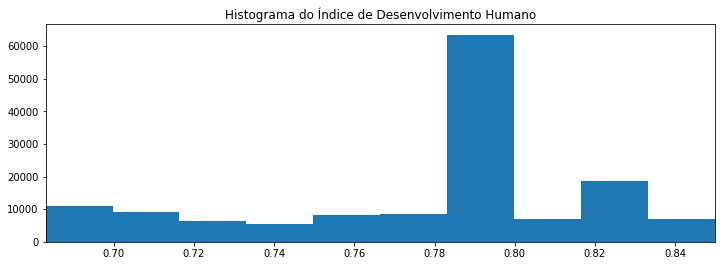

In [22]:
# Histograma do Índice de Desenvolvimento Humano

fig, ax = plt.subplots(figsize=(12,4))

ax.hist(dados['idhm_2017'])
ax.set_title("Histograma do Índice de Desenvolvimento Humano")
ax.set_xlim((min(dados['idhm_2017']), max(dados['idhm_2017'])))

plt.savefig('graficos/hist_idhm.png', format='png')

In [23]:
# Verificando classes de frequências

print(pd.qcut(dados['idhm_2017'], q=4).value_counts(sort=False))

(0.682, 0.766]    40206
(0.766, 0.787]    39057
(0.787, 0.796]    32869
(0.796, 0.85]     32625
Name: idhm_2017, dtype: int64


In [24]:
# Passando os labels

label_idhm = ['A-Até 0,766','B-Acima de 0,766 a 0,787','C-Acima de 0,787 a 0,796','D-Acima de 0,796']


# Criando a variável categorizada

dados['idhm_2017_cat']=pd.qcut(dados['idhm_2017'], q=4, labels=label_idhm)

In [25]:
# Criando a tabela de distribuição de frequências

tab4 = pd.value_counts(dados['idhm_2017_cat']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tab4['%'] = round(100*pd.value_counts(dados['idhm_2017_cat']) / len(dados['idhm_2017_cat']),2)
tab4_total = pd.DataFrame(np.array(tab4.sum()).reshape(1,2), index=['Total'], columns=tab4.columns)
tab4_total['Candidatos'] =int(tab4_total['Candidatos'])
tab4_tabela = tab4.append(tab4_total)
print("Distribuição do número de candidatos segundo o IDHM")
tab4_tabela.to_excel('tabelas/tabela04.xlsx',index=True,index_label='IDHM')

tab4_tabela

Distribuição do número de candidatos segundo o IDHM


Candidatos       %
A-Até 0,766                    40206   27.77
B-Acima de 0,766 a 0,787       39057   26.98
C-Acima de 0,787 a 0,796       32869   22.71
D-Acima de 0,796               32625   22.54
Total                         144757  100.00

In [26]:
# Criando a tabela cruzada target vs idhm

cros_tab4=pd.crosstab(dados['idhm_2017_cat'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['IDHM'],colnames=['Situação:'])

cros_tab4['% Aprovado']=round(100*(cros_tab4['Aprovado']/cros_tab4['Total']),1)
cros_tab4['% Reprovado']=round(100*(cros_tab4['Reprovado']/cros_tab4['Total']),1)

cros_tab4["% Total"]=100*round((cros_tab4["Total"]/len(dados)),3)
cros_tab4 = cros_tab4[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação do candidato segundo o IDHM')
cros_tab4.to_excel('tabelas/tabela04a.xlsx',index=True,index_label='IDHM')

cros_tab4

Situação do candidato segundo o IDHM


Situação:                 Aprovado  Reprovado  % Aprovado  % Reprovado  \
IDHM                                                                     
A-Até 0,766                  13848      26358        34.4         65.6   
B-Acima de 0,766 a 0,787     18117      20940        46.4         53.6   
C-Acima de 0,787 a 0,796     15904      16965        48.4         51.6   
D-Acima de 0,796             15990      16635        49.0         51.0   
Total                        63859      80898        44.1         55.9   

Situação:                  Total  % Total  
IDHM                                       
A-Até 0,766                40206     27.8  
B-Acima de 0,766 a 0,787   39057     27.0  
C-Acima de 0,787 a 0,796   32869     22.7  
D-Acima de 0,796           32625     22.5  
Total                     144757    100.0

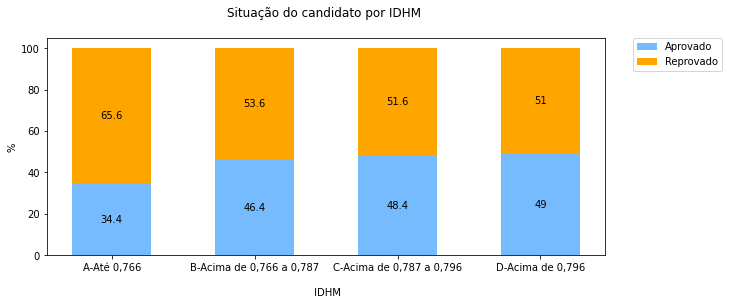

In [27]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

N = len(labels)

labels = label_idhm
aprovados_tab4=cros_tab4['% Aprovado'].head(len(cros_tab4['% Aprovado'])-1)
reprovados_tab4=cros_tab4['% Reprovado'].head(len(cros_tab4['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tab4, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tab4, width,
            bottom=aprovados_tab4, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato por IDHM \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n IDHM')
plt.savefig('graficos/idhm_categ.png', format='png')
plt.show()

In [28]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tab4['Aprovado'], cros_tab4['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2167.92
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2198.78
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.5) Análise por região geográfica

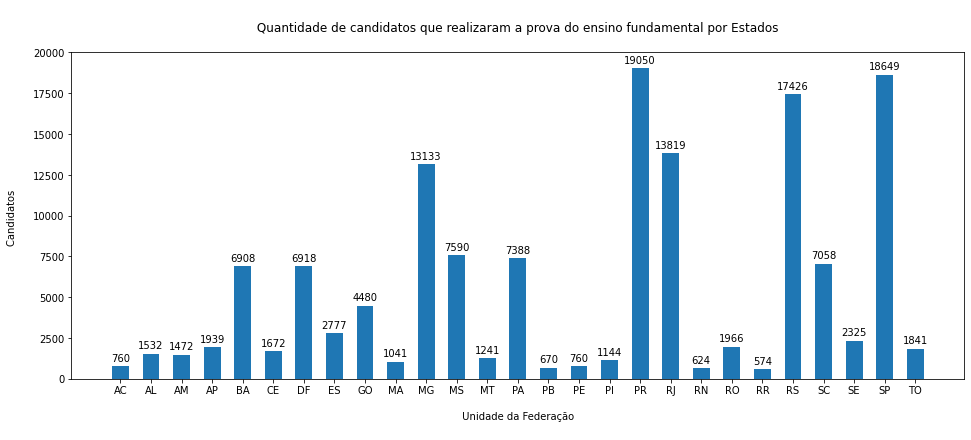

In [29]:
# Total de candidatos que se inscreveram e fizeram a prova do ensino fundamental por Estados

dados['SG_UF_PROVA'].value_counts()

tab5 = pd.value_counts(dados['SG_UF_PROVA']).to_frame(name='Candidatos').rename_axis('UF').sort_index()
tab5['%'] = round(100*pd.value_counts(dados['SG_UF_PROVA']) / len(dados['SG_UF_PROVA']),2)
tab5_total = pd.DataFrame(np.array(tab5.sum()).reshape(1,2), index=['Total'], columns=tab5.columns)
tab5_total['Candidatos'] =int(tab5_total['Candidatos'])
tabela5 = tab5.append(tab5_total)
tabela5.to_excel('tabelas/tabela05.xlsx',index=True,index_label='UF')


# Plotando o gráfico de barras

df=tab5.copy()
df=df.reset_index()


labels = df.UF
frequencia = df.Candidatos

x = np.arange(len(labels))  
width = 0.55  

plt.rcParams['figure.figsize'] = (16,6)
fig, ax = plt.subplots()
rects1 = ax.bar(x , frequencia, width)

ax.set_ylabel('Candidatos \n ')
ax.set_xlabel('\n Unidade da Federação \n')
ax.set_title('\n Quantidade de candidatos que realizaram a prova do ensino fundamental por Estados \n')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(rects1, padding=3)
plt.savefig('graficos/uf.png', format='png')
plt.show()


In [30]:
# Criando o atributo região geográfica

dados['regiao']=dados['SG_UF_PROVA'].copy()


# Agregando os dados por região

dados['regiao']=dados['regiao'].replace(['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA','PB',
'PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO'], ['Norte','Nordeste','Norte','Norte','Nordeste','Nordeste',
                                                               'Centro-oeste','Sudeste','Centro-oeste','Nordeste','Sudeste',
                                                               'Centro-oeste','Centro-oeste','Norte','Nordeste','Nordeste',
                                                               'Nordeste','Sul','Sudeste','Nordeste','Norte','Norte','Sul',
                                                               'Sul','Nordeste','Sudeste','Norte'])


In [31]:
# Criando a tabela de distribuição de frequências

tab5a1 = pd.value_counts(dados['regiao']).to_frame(name='Candidatos').rename_axis('Situação')
tab5a1['%'] = round(100*pd.value_counts(dados['regiao']) / len(dados['regiao']),3)
tab5a1_total = pd.DataFrame(np.array(tab5a1.sum()).reshape(1,2), index=['Total'], columns=tab5a1.columns)
tab5a1_total['Candidatos'] =int(tab5a1_total['Candidatos'])
tab5a1_tabela = tab5a1.append(tab5a1_total)
print("Distribuição do número de candidatos segundo a região geográfica")
tab5a1_tabela.to_excel('tabelas/tabela05a1.xlsx',index=True,index_label='região geográfica')
tab5a1_tabela


Distribuição do número de candidatos segundo a região geográfica


Candidatos        %
Sudeste            48378   33.420
Sul                43534   30.074
Centro-oeste       20229   13.974
Nordeste           16676   11.520
Norte              15940   11.012
Total             144757  100.000

In [32]:
# Criando a tabela cruzada target vs região geográfica

cros_tab5a1=pd.crosstab(dados['regiao'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Região Geográfica'],colnames=['Situação:'])

cros_tab5a1['% Aprovado']=round(100*(cros_tab5a1['Aprovado']/cros_tab5a1['Total']),1)
cros_tab5a1['% Reprovado']=round(100*(cros_tab5a1['Reprovado']/cros_tab5a1['Total']),1)

cros_tab5a1["% Total"]=100*round((cros_tab5a1["Total"]/len(dados)),3)
cros_tab5a1 = cros_tab5a1[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação do candidato segundo a região geográfica')
cros_tab5a1.to_excel('tabelas/tabela05a1a.xlsx',index=True,index_label='Região Geográfica')

cros_tab5a1

Situação do candidato segundo a região geográfica


Situação:          Aprovado  Reprovado  % Aprovado  % Reprovado   Total  \
Região Geográfica                                                         
Centro-oeste           7738      12491        38.3         61.7   20229   
Nordeste               5992      10684        35.9         64.1   16676   
Norte                  5002      10938        31.4         68.6   15940   
Sudeste               24231      24147        50.1         49.9   48378   
Sul                   20896      22638        48.0         52.0   43534   
Total                 63859      80898        44.1         55.9  144757   

Situação:          % Total  
Região Geográfica           
Centro-oeste          14.0  
Nordeste              11.5  
Norte                 11.0  
Sudeste               33.4  
Sul                   30.1  
Total                100.0

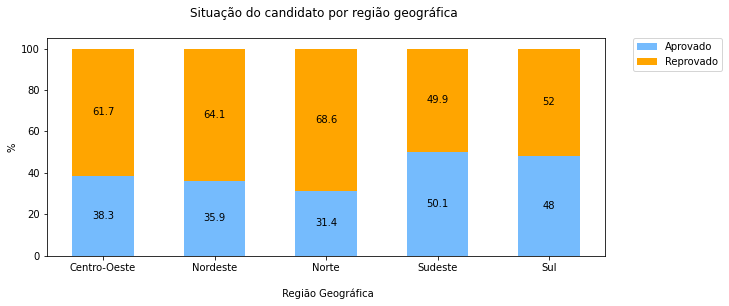

In [33]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['Centro-Oeste','Nordeste','Norte','Sudeste','Sul']

N = len(labels)


aprovados_tab5a1=cros_tab5a1['% Aprovado'].head(len(cros_tab5a1['% Aprovado'])-1)
reprovados_tab5a1=cros_tab5a1['% Reprovado'].head(len(cros_tab5a1['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tab5a1, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tab5a1, width,
            bottom=aprovados_tab5a1, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato por região geográfica \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Região Geográfica')
plt.savefig('graficos/regiao.png', format='png')
plt.show()

In [34]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tab5a1['Aprovado'], cros_tab5a1['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2749.79
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  5

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2789.72
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  5

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.6) Análise do atributo Gênero

In [35]:
# Criando os labels

nome_genero = 'Gênero do candidato'
mapper_genero = {'F': 'Feminino', 'M': 'Masculino'}
label_genero = ['Feminino','Masculino']

# Atribuindo os labels aos dados

dados['TP_SEXO'] = dados['TP_SEXO'].map(mapper_genero).fillna(dados['TP_SEXO'])

In [36]:
# Criando a tabela de distribuição de frequências

tab6 = pd.value_counts(dados['TP_SEXO']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tab6['%'] = round(100*pd.value_counts(dados['TP_SEXO']) / len(dados['TP_SEXO']),3)
tab6_total = pd.DataFrame(np.array(tab6.sum()).reshape(1,2), index=['Total'], columns=tab6.columns)
tab6_total['Candidatos'] =int(tab6_total['Candidatos'])
tab6_tabela = tab6.append(tab6_total)
print("Distribuição do número de candidatos segundo o gênero")
tab6_tabela.to_excel('tabelas/tabela06.xlsx',index=True,index_label='Gênero')
tab6_tabela

Distribuição do número de candidatos segundo o gênero


Candidatos        %
Feminino        75668   52.272
Masculino       69089   47.728
Total          144757  100.000

In [37]:
# Criando a tabela cruzada target vs gênero

cros_tab6=pd.crosstab(dados['TP_SEXO'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Gênero'],colnames=['Situação:'])

cros_tab6['% Aprovado']=round(100*(cros_tab6['Aprovado']/cros_tab6['Total']),1)
cros_tab6['% Reprovado']=round(100*(cros_tab6['Reprovado']/cros_tab6['Total']),1)

cros_tab6["% Total"]=100*round((cros_tab6["Total"]/len(dados)),3)
cros_tab6 = cros_tab6[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação do candidato segundo o gênero')
cros_tab6.to_excel('tabelas/tabela06a.xlsx',index=True,index_label='Gênero')

cros_tab6

Situação do candidato segundo o gênero


Situação:  Aprovado  Reprovado  % Aprovado  % Reprovado   Total  % Total
Gênero                                                                  
Feminino      32566      43102        43.0         57.0   75668     52.3
Masculino     31293      37796        45.3         54.7   69089     47.7
Total         63859      80898        44.1         55.9  144757    100.0

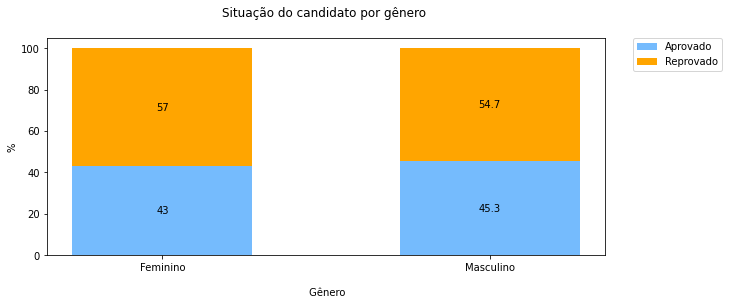

In [38]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = label_genero

N = len(labels)


aprovados_tab6=cros_tab6['% Aprovado'].head(len(cros_tab6['% Aprovado'])-1)
reprovados_tab6=cros_tab6['% Reprovado'].head(len(cros_tab6['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tab6, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tab6, width,
            bottom=aprovados_tab6, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato por gênero \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Gênero')
plt.savefig('graficos/genero.png', format='png')
plt.show()

In [39]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tab6['Aprovado'], cros_tab6['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  74.54
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  74.53
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7) Análise dos atributos relacionados ao questionário sócio-econômico aplicado no Encceja 2019

In [40]:
# Atributos do questionário:

nome_Q01 = 'Quantas pessoas moram com você?'
nome_Q02 = 'A casa onde você mora é?'
nome_Q03 = 'Sua casa está localizada em?'
nome_Q04 = 'Qual é o nível de escolaridade do seu pai?'
nome_Q05 = 'Qual é o nível de escolaridade da sua mãe?'
nome_Q06 = 'Quanto é, aproximadamente, a sua renda familiar mensal?'
nome_Q07 = 'Qual a sua renda mensal, aproximadamente?'
nome_Q08 = 'Você trabalha ou já trabalhou?'
nome_Q18 = 'Você já reprovou alguma vez?'
nome_Q19 = 'Qual principal motivo faria você voltar a estudar ou continuar estudando?'
nome_Q20 = 'Se você já frequentou a escola regular, em que série você deixou de estudar?'
nome_Q21 = 'Se você deixou de frequentar a escola regular, quantos anos você tinha?'
nome_Q31 = 'Você cursa ou já cursou a Educação de Jovens e Adultos EJA?'

# Criando os labels

mapper_Q01 = {'A': 'A-Moro sozinho', 'B': 'B-Uma a três', 'C':'C-Quatro a sete', 'D': 'D-Oito a dez', 'E': 'E-Mais de dez'}

mapper_Q02 = {'A': 'A-Própria', 'B': 'B-Alugada', 'C':'C-Cedida'}

mapper_Q03 = {'A': 'A-Zona rural', 'B': 'B-Zona urbana', 'C':'C-Comunidade indígena', 'D': 'D-Comunidade quilombola'}

mapper_Q04 = {'A': 'A-Da 1ª à 4ª série do Ensino Fundamental', 'B': 'B-Da 5ª à 8ª série do Ensino Fundamental',
              'C':'C-Ensino Médio', 'D': 'D-Ensino Superior','E': 'E-Especialização', 'F': 'F-Não estudou','G': 'G-Não sei'}

mapper_Q05 = {'A': 'A-Da 1ª à 4ª série do Ensino Fundamental', 'B': 'B-Da 5ª à 8ª série do Ensino Fundamental',
              'C':'C-Ensino Médio', 'D': 'D-Ensino Superior','E': 'E-Especialização', 'F': 'F-Não estudou',
              'G': 'G-Não sei'}

mapper_Q06 = {'A': 'A-Nenhuma renda', 'B': 'B-Até 1 salário mínimo', 'C':'C-De 1 a 3 salários mínimos',
              'D': 'D-De 3 a 6 salários mínimos','E': 'E-De 6 a 9 salários mínimos', 
              'F': 'F-De 9 a 12 salários mínimos','G': 'G-De 12 a 15 salários mínimos', 'H': 'H-Mais de 15 salários mínimos'}

mapper_Q07 = {'A': 'A-Nenhuma renda', 'B': 'B-Até 1 salário mínimo', 'C':'C-De 1 a 3 salários mínimos',
              'D': 'D-De 3 a 6 salários mínimos','E': 'E-De 6 a 9 salários mínimos', 
              'F': 'F-De 9 a 12 salários mínimos','G': 'G-De 12 a 15 salários mínimos', 'H': 'H-Mais de 15 salários mínimos'}

mapper_Q08 = {'A': 'A-Sim', 'B': 'B-Não'}

mapper_Q18 = {'A': 'A-Nenhuma vez', 'B': 'B-Uma vez', 'C':'C-Duas vezes', 'D': 'D-Três vezes ou mais'}

mapper_Q19 = {'A': 'A-Conseguir um emprego', 'B': 'B-Progredir no emprego atual', 'C':'C-Conseguir um emprego melhor', 
              'D': 'D-Adquirir mais conhecimento, ficar atualizado',
              'E': 'E-Atender à expectativa de meus familiares sobre meus estudos','F': 'F-Não pretendo voltar a estudar'}

mapper_Q20 = {'A': 'A-Não frequentei', 'B': 'B-1ª série do ensino fundamental', 'C':'C-2ª série do ensino fundamental',
              'D': 'D-3ª série do ensino fundamental','E': 'E-4ª série do ensino fundamental', 
              'F': 'F-5ª série do ensino fundamental','G': 'G-6ªsérie do ensino fundamental',
              'H': 'H-7ª série do ensino fundamental','I': 'I-8ª série do ensino fundamental',
              'J': 'J-1ª série do ensino médio','K': 'K-2ª série do ensino médio',
              'L': 'L-3ª série do ensino médio'}

mapper_Q21 = {'A': 'A-Nunca frequentei a escola', 'B': 'B-Estou frequentando a escola', 'C':'C-Menos de 10 anos',
              'D': 'D-Entre 10 e 14 anos','E': 'E-Entre 15 e 18 anos', 
              'F': 'F-Entre 19 e 24 anos','G': 'G-Entre 25 e 30 anos', 'H': 'H-Mais de 30 anos'}

mapper_Q31 = {'A': 'A-Sim', 'B': 'B-Não'}


# Atribuindo os labels aos dados

dados['Q01'] = dados['Q01'].map(mapper_Q01).fillna(dados['Q01'])
dados['Q02'] = dados['Q02'].map(mapper_Q02).fillna(dados['Q02'])
dados['Q03'] = dados['Q03'].map(mapper_Q03).fillna(dados['Q03'])
dados['Q04'] = dados['Q04'].map(mapper_Q04).fillna(dados['Q04'])
dados['Q05'] = dados['Q05'].map(mapper_Q05).fillna(dados['Q05'])
dados['Q06'] = dados['Q06'].map(mapper_Q06).fillna(dados['Q06'])
dados['Q07'] = dados['Q07'].map(mapper_Q07).fillna(dados['Q07'])
dados['Q08'] = dados['Q08'].map(mapper_Q08).fillna(dados['Q08'])
dados['Q18'] = dados['Q18'].map(mapper_Q18).fillna(dados['Q18'])
dados['Q19'] = dados['Q19'].map(mapper_Q19).fillna(dados['Q19'])
dados['Q20'] = dados['Q20'].map(mapper_Q20).fillna(dados['Q20'])
dados['Q21'] = dados['Q21'].map(mapper_Q21).fillna(dados['Q21'])
dados['Q31'] = dados['Q31'].map(mapper_Q31).fillna(dados['Q31'])

#### 2.7.1) Análise do atributo Q01

In [41]:
# Criando a tabela de distribuição de frequências

tabQ01 = pd.value_counts(dados['Q01']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ01['%'] = round(100*pd.value_counts(dados['Q01']) / len(dados['Q01']),3)
tabQ01_total = pd.DataFrame(np.array(tabQ01.sum()).reshape(1,2), index=['Total'], columns=tabQ01.columns)
tabQ01_total['Candidatos'] =int(tabQ01_total['Candidatos'])
tabQ01_tabela = tabQ01.append(tabQ01_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q01)
tabQ01_tabela.to_excel('tabelas/tabelaQ01.xlsx',index=True,index_label='Qtde de pessoas')
tabQ01_tabela

Distribuição do número de candidatos em relação a pergunta 
 Quantas pessoas moram com você?


Candidatos        %
A-Moro sozinho         5498    3.798
B-Uma a três          71787   49.591
C-Quatro a sete       62992   43.516
D-Oito a dez           3491    2.412
E-Mais de dez           989    0.683
Total                144757  100.000

In [42]:
# Agregando categorias

dados['Q01']=dados['Q01'].replace(['A-Moro sozinho','B-Uma a três',
                                   'C-Quatro a sete','D-Oito a dez','E-Mais de dez'], ['A','A','B','B','B'])
mapper_Q01 = {'A': 'A-Até 3 pessoas', 'B': 'B-Mais de 3 pessoas'}
dados['Q01'] = dados['Q01'].map(mapper_Q01).fillna(dados['Q01'])

In [43]:
# Criando a tabela de distribuição de frequências

tabQ01 = pd.value_counts(dados['Q01']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ01['%'] = round(100*pd.value_counts(dados['Q01']) / len(dados['Q01']),3)
tabQ01_total = pd.DataFrame(np.array(tabQ01.sum()).reshape(1,2), index=['Total'], columns=tabQ01.columns)
tabQ01_total['Candidatos'] =int(tabQ01_total['Candidatos'])
tabQ01_tabela = tabQ01.append(tabQ01_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q01)
tabQ01_tabela.to_excel('tabelas/tabelaQ01a.xlsx',index=True,index_label='Qtde de pessoas')
tabQ01_tabela

Distribuição do número de candidatos em relação a pergunta 
 Quantas pessoas moram com você?


Candidatos        %
A-Até 3 pessoas           77285   53.389
B-Mais de 3 pessoas       67472   46.611
Total                    144757  100.000

In [44]:
# Criando a tabela cruzada target vs Q01

cros_tabQ01=pd.crosstab(dados['Q01'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Qtde de pessoas'],colnames=['Situação:'])

cros_tabQ01['% Aprovado']=round(100*(cros_tabQ01['Aprovado']/cros_tabQ01['Total']),1)
cros_tabQ01['% Reprovado']=round(100*(cros_tabQ01['Reprovado']/cros_tabQ01['Total']),1)

cros_tabQ01["% Total"]=100*round((cros_tabQ01["Total"]/len(dados)),3)
cros_tabQ01 = cros_tabQ01[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]


print('Situação em relação à quantidade de pessoas com quem mora')
cros_tabQ01.to_excel('tabelas/tabelaQ01b.xlsx',index=True,index_label='Qtde de pessoas')
cros_tabQ01

Situação em relação à quantidade de pessoas com quem mora


Situação:            Aprovado  Reprovado  % Aprovado  % Reprovado   Total  \
Qtde de pessoas                                                             
A-Até 3 pessoas         35497      41788        45.9         54.1   77285   
B-Mais de 3 pessoas     28362      39110        42.0         58.0   67472   
Total                   63859      80898        44.1         55.9  144757   

Situação:            % Total  
Qtde de pessoas               
A-Até 3 pessoas         53.4  
B-Mais de 3 pessoas     46.6  
Total                  100.0

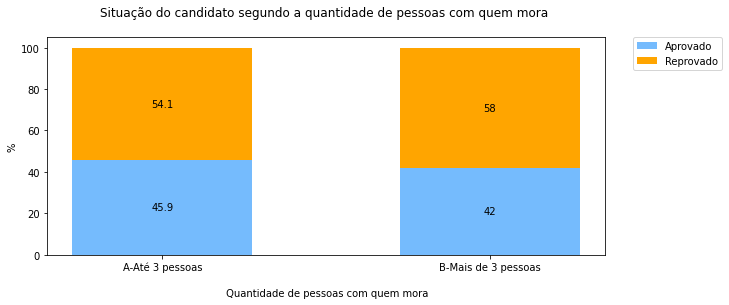

In [45]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Até 3 pessoas', 'B-Mais de 3 pessoas']
N = len(labels)

aprovados_tabQ01=cros_tabQ01['% Aprovado'].head(len(cros_tabQ01['% Aprovado'])-1)
reprovados_tabQ01=cros_tabQ01['% Reprovado'].head(len(cros_tabQ01['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ01, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ01, width,
            bottom=aprovados_tabQ01, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo a quantidade de pessoas com quem mora \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Quantidade de pessoas com quem mora')
plt.savefig('graficos/Q01.png', format='png')

plt.show()

In [46]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ01['Aprovado'], cros_tabQ01['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  221.65
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  221.8
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.2) Análise do atributo Q02

In [47]:
# Criando a tabela de distribuição de frequências

tabQ02 = pd.value_counts(dados['Q02']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ02['%'] = round(100*pd.value_counts(dados['Q02']) / len(dados['Q02']),3)
tabQ02_total = pd.DataFrame(np.array(tabQ02.sum()).reshape(1,2), index=['Total'], columns=tabQ02.columns)
tabQ02_total['Candidatos'] =int(tabQ02_total['Candidatos'])
tabQ02_tabela = tabQ02.append(tabQ02_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q02)
tabQ02_tabela.to_excel('tabelas/tabelaQ02.xlsx',index=True,index_label='Tipo de moradia')
tabQ02_tabela

Distribuição do número de candidatos em relação a pergunta 
 A casa onde você mora é?


Candidatos       %
A-Própria       83815  57.900
B-Alugada       41043  28.353
C-Cedida        19899  13.746
Total          144757  99.999

In [48]:
# Agregando categorias

dados['Q02']=dados['Q02'].replace(['A-Própria','B-Alugada',
                                   'C-Cedida'], ['A','B','B'])
mapper_Q02 = {'A': 'A-Própria', 'B': 'B-Alugada/cedida'}
dados['Q02'] = dados['Q02'].map(mapper_Q02).fillna(dados['Q02'])

In [49]:
# Criando a tabela de distribuição de frequências

tabQ02 = pd.value_counts(dados['Q02']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ02['%'] = round(100*pd.value_counts(dados['Q02']) / len(dados['Q02']),3)
tabQ02_total = pd.DataFrame(np.array(tabQ02.sum()).reshape(1,2), index=['Total'], columns=tabQ02.columns)
tabQ02_total['Candidatos'] =int(tabQ02_total['Candidatos'])
tabQ02_tabela = tabQ02.append(tabQ02_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q02)
tabQ02_tabela.to_excel('tabelas/tabelaQ02a.xlsx',index=True,index_label='Tipo de moradia')
tabQ02_tabela

Distribuição do número de candidatos em relação a pergunta 
 A casa onde você mora é?


Candidatos      %
A-Própria              83815   57.9
B-Alugada/cedida       60942   42.1
Total                 144757  100.0

In [50]:
# Criando a tabela cruzada target vs Q02

cros_tabQ02=pd.crosstab(dados['Q02'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Tipo de moradia'],colnames=['Situação:'])

cros_tabQ02['% Aprovado']=round(100*(cros_tabQ02['Aprovado']/cros_tabQ02['Total']),1)
cros_tabQ02['% Reprovado']=round(100*(cros_tabQ02['Reprovado']/cros_tabQ02['Total']),1)

cros_tabQ02["% Total"]=100*round((cros_tabQ02["Total"]/len(dados)),3)
cros_tabQ02 = cros_tabQ02[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]


print('Situação em relação ao tipo de moradia')
cros_tabQ02.to_excel('tabelas/tabelaQ02b.xlsx',index=True,index_label='Tipo de moradia')

cros_tabQ02

Situação em relação ao tipo de moradia


Situação:         Aprovado  Reprovado  % Aprovado  % Reprovado   Total  \
Tipo de moradia                                                          
A-Própria            35280      48535        42.1         57.9   83815   
B-Alugada/cedida     28579      32363        46.9         53.1   60942   
Total                63859      80898        44.1         55.9  144757   

Situação:         % Total  
Tipo de moradia            
A-Própria            57.9  
B-Alugada/cedida     42.1  
Total               100.0

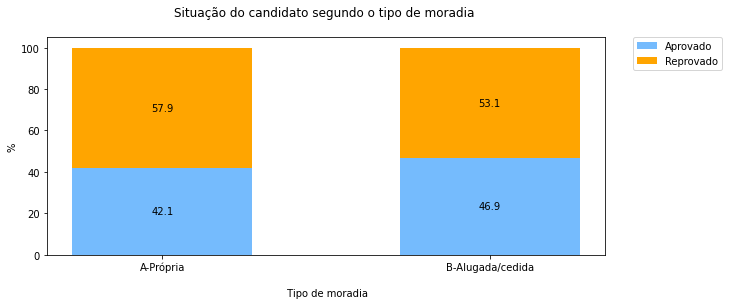

In [51]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Própria', 'B-Alugada/cedida']
N = len(labels)

aprovados_tabQ02=cros_tabQ02['% Aprovado'].head(len(cros_tabQ02['% Aprovado'])-1)
reprovados_tabQ02=cros_tabQ02['% Reprovado'].head(len(cros_tabQ02['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ02, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ02, width,
            bottom=aprovados_tabQ02, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo o tipo de moradia \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Tipo de moradia')
plt.savefig('graficos/Q02.png', format='png')
plt.show()

In [52]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ02['Aprovado'], cros_tabQ02['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  330.13
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  329.88
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.3) Análise do atributo Q03

In [53]:
# Criando a tabela de distribuição de frequências

tabQ03 = pd.value_counts(dados['Q03']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ03['%'] = round(100*pd.value_counts(dados['Q03']) / len(dados['Q03']),3)
tabQ03_total = pd.DataFrame(np.array(tabQ03.sum()).reshape(1,2), index=['Total'], columns=tabQ03.columns)
tabQ03_total['Candidatos'] =int(tabQ03_total['Candidatos'])
tabQ03_tabela = tabQ03.append(tabQ03_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q03)
tabQ03_tabela.to_excel('tabelas/tabelaQ03.xlsx',index=True,index_label='Local de moradia')
tabQ03_tabela

Distribuição do número de candidatos em relação a pergunta 
 Sua casa está localizada em?


Candidatos        %
A-Zona rural                  18023   12.451
B-Zona urbana                126086   87.102
C-Comunidade indígena           396    0.274
D-Comunidade quilombola         252    0.174
Total                        144757  100.001

In [54]:
# Agregando categorias

dados['Q03']=dados['Q03'].replace(['A-Zona rural','B-Zona urbana',
                                   'C-Comunidade indígena','D-Comunidade quilombola'], ['A','B','A','A'])
mapper_Q03 = {'A': 'A-Zona não urbana', 'B': 'B-Zona urbana'}
dados['Q03'] = dados['Q03'].map(mapper_Q03).fillna(dados['Q03'])

In [55]:
# Criando a tabela de distribuição de frequências

tabQ03 = pd.value_counts(dados['Q03']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ03['%'] = round(100*pd.value_counts(dados['Q03']) / len(dados['Q03']),3)
tabQ03_total = pd.DataFrame(np.array(tabQ03.sum()).reshape(1,2), index=['Total'], columns=tabQ03.columns)
tabQ03_total['Candidatos'] =int(tabQ03_total['Candidatos'])
tabQ03_tabela = tabQ03.append(tabQ03_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q03)
tabQ03_tabela.to_excel('tabelas/tabelaQ03a.xlsx',index=True,index_label='Local de moradia')

tabQ03_tabela

Distribuição do número de candidatos em relação a pergunta 
 Sua casa está localizada em?


Candidatos        %
A-Zona não urbana       18671   12.898
B-Zona urbana          126086   87.102
Total                  144757  100.000

In [56]:
# Criando a tabela cruzada target vs Q03

cros_tabQ03=pd.crosstab(dados['Q03'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Local da moradia'],colnames=['Situação:'])

cros_tabQ03['% Aprovado']=round(100*(cros_tabQ03['Aprovado']/cros_tabQ03['Total']),1)
cros_tabQ03['% Reprovado']=round(100*(cros_tabQ03['Reprovado']/cros_tabQ03['Total']),1)

cros_tabQ03["% Total"]=100*round((cros_tabQ03["Total"]/len(dados)),3)
cros_tabQ03 = cros_tabQ03[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação ao local da moradia')

cros_tabQ03.to_excel('tabelas/tabelaQ03b.xlsx',index=True,index_label='Local da moradia')
cros_tabQ03

Situação em relação ao local da moradia


Situação:          Aprovado  Reprovado  % Aprovado  % Reprovado   Total  \
Local da moradia                                                          
A-Zona não urbana      7053      11618        37.8         62.2   18671   
B-Zona urbana         56806      69280        45.1         54.9  126086   
Total                 63859      80898        44.1         55.9  144757   

Situação:          % Total  
Local da moradia            
A-Zona não urbana     12.9  
B-Zona urbana         87.1  
Total                100.0

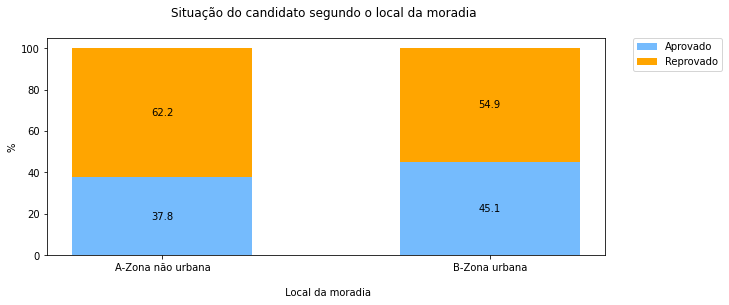

In [57]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Zona não urbana', 'B-Zona urbana' ]
N = len(labels)

aprovados_tabQ03=cros_tabQ03['% Aprovado'].head(len(cros_tabQ03['% Aprovado'])-1)
reprovados_tabQ03=cros_tabQ03['% Reprovado'].head(len(cros_tabQ03['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ03, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ03, width,
            bottom=aprovados_tabQ03, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo o local da moradia \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Local da moradia')

plt.savefig('graficos/Q03.png', format='png')
plt.show()

In [58]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ03['Aprovado'], cros_tabQ03['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  349.43
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  353.35
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.4) Análise do atributo Q04

In [59]:
# Criando a tabela de distribuição de frequências

tabQ04 = pd.value_counts(dados['Q04']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ04['%'] = round(100*pd.value_counts(dados['Q04']) / len(dados['Q04']),3)
tabQ04_total = pd.DataFrame(np.array(tabQ04.sum()).reshape(1,2), index=['Total'], columns=tabQ04.columns)
tabQ04_total['Candidatos'] =int(tabQ04_total['Candidatos'])
tabQ04_tabela = tabQ04.append(tabQ04_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q04)
tabQ04_tabela.to_excel('tabelas/tabelaQ04.xlsx',index=True,index_label='Escolaridade do pai')

tabQ04_tabela

Distribuição do número de candidatos em relação a pergunta 
 Qual é o nível de escolaridade do seu pai?


Candidatos        %
A-Da 1ª à 4ª série do Ensino Fundamental       50731   35.046
B-Da 5ª à 8ª série do Ensino Fundamental       27027   18.671
C-Ensino Médio                                 14062    9.714
D-Ensino Superior                               2337    1.614
E-Especialização                                 414    0.286
F-Não estudou                                  17400   12.020
G-Não sei                                      32786   22.649
Total                                         144757  100.000

In [60]:
# Agregando categorias

dados['Q04']=dados['Q04'].replace(['F-Não estudou','A-Da 1ª à 4ª série do Ensino Fundamental',
                                   'B-Da 5ª à 8ª série do Ensino Fundamental','C-Ensino Médio',
                                   'D-Ensino Superior','E-Especialização',
                                   'G-Não sei'], ['A','B','C','D','D','D','A'])

mapper_Q04 = {'A': 'A-Não estudou/não sabe', 'B': 'B-Antigo primário', 'C': 'C-Antigo ginásio',
              'D': 'D-Médio/Superior/especialização'}

dados['Q04'] = dados['Q04'].map(mapper_Q04).fillna(dados['Q04'])


In [61]:
# Criando a tabela de distribuição de frequências

tabQ04 = pd.value_counts(dados['Q04']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ04['%'] = round(100*pd.value_counts(dados['Q04']) / len(dados['Q04']),3)
tabQ04_total = pd.DataFrame(np.array(tabQ04.sum()).reshape(1,2), index=['Total'], columns=tabQ04.columns)
tabQ04_total['Candidatos'] =int(tabQ04_total['Candidatos'])
tabQ04_tabela = tabQ04.append(tabQ04_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q04)

tabQ04_tabela.to_excel('tabelas/tabelaQ04a.xlsx',index=True,index_label='Escolaridade do pai')

tabQ04_tabela

Distribuição do número de candidatos em relação a pergunta 
 Qual é o nível de escolaridade do seu pai?


Candidatos        %
A-Não estudou/não sabe                50186   34.669
B-Antigo primário                     50731   35.046
C-Antigo ginásio                      27027   18.671
D-Médio/Superior/especialização       16813   11.615
Total                                144757  100.001

In [62]:
# Criando a tabela cruzada target vs Q04

cros_tabQ04=pd.crosstab(dados['Q04'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Escolaridade do pai'],colnames=['Situação:'])

cros_tabQ04['% Aprovado']=round(100*(cros_tabQ04['Aprovado']/cros_tabQ04['Total']),1)
cros_tabQ04['% Reprovado']=round(100*(cros_tabQ04['Reprovado']/cros_tabQ04['Total']),1)

cros_tabQ04["% Total"]=100*round((cros_tabQ04["Total"]/len(dados)),3)
cros_tabQ04 = cros_tabQ04[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação à escolaridade do pai')

cros_tabQ04.to_excel('tabelas/tabelaQ04b.xlsx',index=True,index_label='Escolaridade do pai')

cros_tabQ04

Situação em relação à escolaridade do pai


Situação:                        Aprovado  Reprovado  % Aprovado  % Reprovado  \
Escolaridade do pai                                                             
A-Não estudou/não sabe              20523      29663        40.9         59.1   
B-Antigo primário                   23383      27348        46.1         53.9   
C-Antigo ginásio                    11704      15323        43.3         56.7   
D-Médio/Superior/especialização      8249       8564        49.1         50.9   
Total                               63859      80898        44.1         55.9   

Situação:                         Total  % Total  
Escolaridade do pai                               
A-Não estudou/não sabe            50186     34.7  
B-Antigo primário                 50731     35.0  
C-Antigo ginásio                  27027     18.7  
D-Médio/Superior/especialização   16813     11.6  
Total                            144757    100.0

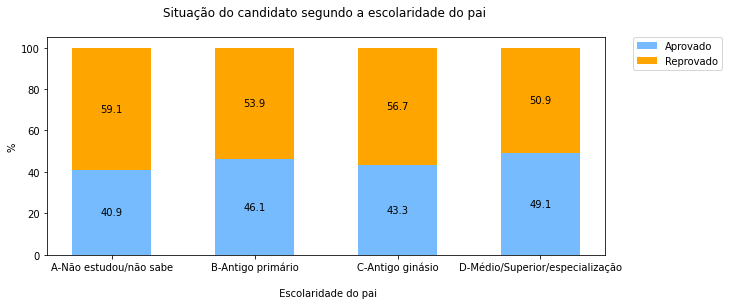

In [63]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Não estudou/não sabe','B-Antigo primário','C-Antigo ginásio','D-Médio/Superior/especialização']



N = len(labels)

aprovados_tabQ04=cros_tabQ04['% Aprovado'].head(len(cros_tabQ04['% Aprovado'])-1)
reprovados_tabQ04=cros_tabQ04['% Reprovado'].head(len(cros_tabQ04['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ04, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ04, width,
            bottom=aprovados_tabQ04, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo a escolaridade do pai \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Escolaridade do pai')
plt.savefig('graficos/Q04.png', format='png')
plt.show()

In [64]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ04['Aprovado'], cros_tabQ04['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  465.82
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  465.82
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.5) Análise do atributo Q05

In [65]:
# Criando a tabela de distribuição de frequências

tabQ05 = pd.value_counts(dados['Q05']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ05['%'] = round(100*pd.value_counts(dados['Q05']) / len(dados['Q05']),3)
tabQ05_total = pd.DataFrame(np.array(tabQ05.sum()).reshape(1,2), index=['Total'], columns=tabQ05.columns)
tabQ05_total['Candidatos'] =int(tabQ05_total['Candidatos'])
tabQ05_tabela = tabQ05.append(tabQ05_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q05)
tabQ05_tabela.to_excel('tabelas/tabelaQ05.xlsx',index=True,index_label='Escolaridade da mãe')

tabQ05_tabela

Distribuição do número de candidatos em relação a pergunta 
 Qual é o nível de escolaridade da sua mãe?


Candidatos        %
A-Da 1ª à 4ª série do Ensino Fundamental       50940   35.190
B-Da 5ª à 8ª série do Ensino Fundamental       30302   20.933
C-Ensino Médio                                 19939   13.774
D-Ensino Superior                               3864    2.669
E-Especialização                                 896    0.619
F-Não estudou                                  19245   13.295
G-Não sei                                      19571   13.520
Total                                         144757  100.000

In [66]:
# Agregando categorias

dados['Q05']=dados['Q05'].replace(['F-Não estudou','A-Da 1ª à 4ª série do Ensino Fundamental',
                                   'B-Da 5ª à 8ª série do Ensino Fundamental','C-Ensino Médio',
                                   'D-Ensino Superior','E-Especialização',
                                   'G-Não sei'], ['A','B','C','D','D','D','A'])

mapper_Q05 = {'A': 'A-Não estudou/não sabe', 'B': 'B-Antigo primário', 'C': 'C-Antigo ginásio',
              'D': 'D-Médio/Superior/especialização'}

dados['Q05'] = dados['Q05'].map(mapper_Q05).fillna(dados['Q05'])

In [67]:
# Criando a tabela de distribuição de frequências

tabQ05 = pd.value_counts(dados['Q05']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ05['%'] = round(100*pd.value_counts(dados['Q05']) / len(dados['Q05']),3)
tabQ05_total = pd.DataFrame(np.array(tabQ05.sum()).reshape(1,2), index=['Total'], columns=tabQ05.columns)
tabQ05_total['Candidatos'] =int(tabQ05_total['Candidatos'])
tabQ05_tabela = tabQ05.append(tabQ05_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q05)

tabQ05_tabela.to_excel('tabelas/tabelaQ05a.xlsx',index=True,index_label='Escolaridade da mãe')

tabQ05_tabela

Distribuição do número de candidatos em relação a pergunta 
 Qual é o nível de escolaridade da sua mãe?


Candidatos        %
A-Não estudou/não sabe                38816   26.815
B-Antigo primário                     50940   35.190
C-Antigo ginásio                      30302   20.933
D-Médio/Superior/especialização       24699   17.062
Total                                144757  100.000

In [68]:
# Criando a tabela cruzada target vs Q05

cros_tabQ05=pd.crosstab(dados['Q05'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Escolaridade da mãe'],colnames=['Situação:'])

cros_tabQ05['% Aprovado']=round(100*(cros_tabQ05['Aprovado']/cros_tabQ05['Total']),1)
cros_tabQ05['% Reprovado']=round(100*(cros_tabQ05['Reprovado']/cros_tabQ05['Total']),1)

cros_tabQ05["% Total"]=100*round((cros_tabQ05["Total"]/len(dados)),3)
cros_tabQ05 = cros_tabQ05[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação à escolaridade da mãe')
cros_tabQ05.to_excel('tabelas/tabelaQ05b.xlsx',index=True,index_label='Escolaridade da mãe')

cros_tabQ05

Situação em relação à escolaridade da mãe


Situação:                        Aprovado  Reprovado  % Aprovado  % Reprovado  \
Escolaridade da mãe                                                             
A-Não estudou/não sabe              15411      23405        39.7         60.3   
B-Antigo primário                   23629      27311        46.4         53.6   
C-Antigo ginásio                    13266      17036        43.8         56.2   
D-Médio/Superior/especialização     11553      13146        46.8         53.2   
Total                               63859      80898        44.1         55.9   

Situação:                         Total  % Total  
Escolaridade da mãe                               
A-Não estudou/não sabe            38816     26.8  
B-Antigo primário                 50940     35.2  
C-Antigo ginásio                  30302     20.9  
D-Médio/Superior/especialização   24699     17.1  
Total                            144757    100.0

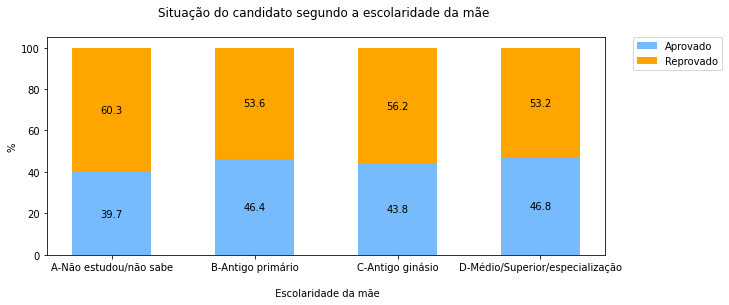

In [69]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Não estudou/não sabe','B-Antigo primário','C-Antigo ginásio','D-Médio/Superior/especialização']


N = len(labels)

aprovados_tabQ05=cros_tabQ05['% Aprovado'].head(len(cros_tabQ05['% Aprovado'])-1)
reprovados_tabQ05=cros_tabQ05['% Reprovado'].head(len(cros_tabQ05['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ05, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ05, width,
            bottom=aprovados_tabQ05, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo a escolaridade da mãe \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Escolaridade da mãe')
plt.savefig('graficos/Q05.png', format='png')
plt.show()

In [70]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ05['Aprovado'], cros_tabQ05['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  485.36
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  487.34
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.6) Análise do atributo Q06

In [71]:
# Criando a tabela de distribuição de frequências

tabQ06 = pd.value_counts(dados['Q06']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ06['%'] = round(100*pd.value_counts(dados['Q06']) / len(dados['Q06']),3)
tabQ06_total = pd.DataFrame(np.array(tabQ06.sum()).reshape(1,2), index=['Total'], columns=tabQ06.columns)
tabQ06_total['Candidatos'] =int(tabQ06_total['Candidatos'])
tabQ06_tabela = tabQ06.append(tabQ06_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q06)
tabQ06_tabela.to_excel('tabelas/tabelaQ06.xlsx',index=True,index_label='Renda em salários mínimos')

tabQ06_tabela

Distribuição do número de candidatos em relação a pergunta 
 Quanto é, aproximadamente, a sua renda familiar mensal?


Candidatos        %
A-Nenhuma renda                      9422    6.509
B-Até 1 salário mínimo              58998   40.757
C-De 1 a 3 salários mínimos         66642   46.037
D-De 3 a 6 salários mínimos          8322    5.749
E-De 6 a 9 salários mínimos           864    0.597
F-De 9 a 12 salários mínimos          246    0.170
G-De 12 a 15 salários mínimos         120    0.083
H-Mais de 15 salários mínimos         143    0.099
Total                              144757  100.001

In [72]:
# Agregando categorias

dados['Q06']=dados['Q06'].replace(['A-Nenhuma renda','B-Até 1 salário mínimo',
                                   'C-De 1 a 3 salários mínimos','D-De 3 a 6 salários mínimos',
                                   'E-De 6 a 9 salários mínimos','F-De 9 a 12 salários mínimos',
                                   'G-De 12 a 15 salários mínimos','H-Mais de 15 salários mínimos' ],
                                  ['A','A','B','B','B','B','B','B'])

mapper_Q06 = {'A': 'A-Até 1 SM', 'B': 'B-Mais de 1 SM'}

dados['Q06'] = dados['Q06'].map(mapper_Q06).fillna(dados['Q06'])


In [73]:
# Criando a tabela de distribuição de frequências

tabQ06 = pd.value_counts(dados['Q06']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ06['%'] = round(100*pd.value_counts(dados['Q06']) / len(dados['Q06']),3)
tabQ06_total = pd.DataFrame(np.array(tabQ06.sum()).reshape(1,2), index=['Total'], columns=tabQ06.columns)
tabQ06_total['Candidatos'] =int(tabQ06_total['Candidatos'])
tabQ06_tabela = tabQ06.append(tabQ06_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q06, "\n (SM = salários mínimos)")

tabQ06_tabela.to_excel('tabelas/tabelaQ06a.xlsx',index=True,index_label='Renda em salários mínimos')

tabQ06_tabela

Distribuição do número de candidatos em relação a pergunta 
 Quanto é, aproximadamente, a sua renda familiar mensal? 
 (SM = salários mínimos)


Candidatos        %
A-Até 1 SM           68420   47.265
B-Mais de 1 SM       76337   52.735
Total               144757  100.000

In [74]:
# Criando a tabela cruzada target vs Q06

cros_tabQ06=pd.crosstab(dados['Q06'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Renda em salários mínimos'],colnames=['Situação:'])

cros_tabQ06['% Aprovado']=round(100*(cros_tabQ06['Aprovado']/cros_tabQ06['Total']),1)
cros_tabQ06['% Reprovado']=round(100*(cros_tabQ06['Reprovado']/cros_tabQ06['Total']),1)

cros_tabQ06["% Total"]=100*round((cros_tabQ06["Total"]/len(dados)),3)
cros_tabQ06 = cros_tabQ06[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]


print('Situação em relação à renda familiar')
cros_tabQ06.to_excel('tabelas/tabelaQ06b.xlsx',index=True,index_label='Renda em salários mínimos')

cros_tabQ06

Situação em relação à renda familiar


Situação:                  Aprovado  Reprovado  % Aprovado  % Reprovado  \
Renda em salários mínimos                                                 
A-Até 1 SM                    25977      42443        38.0         62.0   
B-Mais de 1 SM                37882      38455        49.6         50.4   
Total                         63859      80898        44.1         55.9   

Situação:                   Total  % Total  
Renda em salários mínimos                   
A-Até 1 SM                  68420     47.3  
B-Mais de 1 SM              76337     52.7  
Total                      144757    100.0

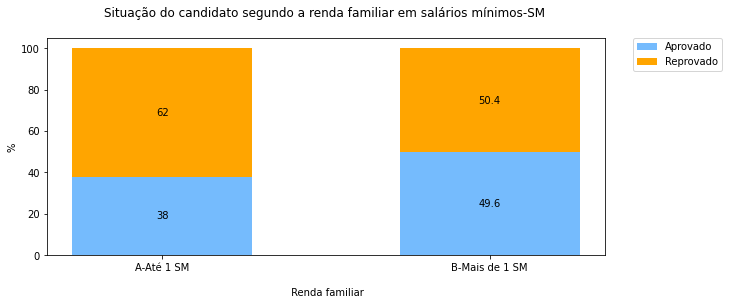

In [75]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Até 1 SM','B-Mais de 1 SM']

N = len(labels)

aprovados_tabQ06=cros_tabQ06['% Aprovado'].head(len(cros_tabQ06['% Aprovado'])-1)
reprovados_tabQ06=cros_tabQ06['% Reprovado'].head(len(cros_tabQ06['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ06, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ06, width,
            bottom=aprovados_tabQ06, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo a renda familiar em salários mínimos-SM \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Renda familiar')
plt.savefig('graficos/Q06.png', format='png')
plt.show()

In [76]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ06['Aprovado'], cros_tabQ06['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1988.96
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1995.91
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.7) Análise do atributo Q07

In [77]:
# Criando a tabela de distribuição de frequências

tabQ07 = pd.value_counts(dados['Q07']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ07['%'] = round(100*pd.value_counts(dados['Q07']) / len(dados['Q07']),5)
tabQ07_total = pd.DataFrame(np.array(tabQ07.sum()).reshape(1,2), index=['Total'], columns=tabQ07.columns)
tabQ07_total['Candidatos'] =int(tabQ07_total['Candidatos'])
tabQ07_tabela = tabQ07.append(tabQ07_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q07)
tabQ07_tabela.to_excel('tabelas/tabelaQ07.xlsx',index=True,index_label='Renda em salários mínimos')

tabQ07_tabela

Distribuição do número de candidatos em relação a pergunta 
 Qual a sua renda mensal, aproximadamente?


Candidatos          %
A-Nenhuma renda                     50323   34.76378
B-Até 1 salário mínimo              57643   39.82053
C-De 1 a 3 salários mínimos         34755   24.00920
D-De 3 a 6 salários mínimos          1672    1.15504
E-De 6 a 9 salários mínimos           161    0.11122
F-De 9 a 12 salários mínimos           78    0.05388
G-De 12 a 15 salários mínimos          56    0.03869
H-Mais de 15 salários mínimos          69    0.04767
Total                              144757  100.00001

In [78]:
# Agregando categorias

dados['Q07']=dados['Q07'].replace(['A-Nenhuma renda','B-Até 1 salário mínimo',
                                   'C-De 1 a 3 salários mínimos','D-De 3 a 6 salários mínimos',
                                   'E-De 6 a 9 salários mínimos','F-De 9 a 12 salários mínimos',
                                   'G-De 12 a 15 salários mínimos','H-Mais de 15 salários mínimos' ],
                                  ['A','B','C','C','C','C','C','C'])

mapper_Q07 = {'A': 'A-Nenhuma renda', 'B': 'B-Até 1 SM', 'C': 'C-Mais de 1 SM'}

dados['Q07'] = dados['Q07'].map(mapper_Q07).fillna(dados['Q07'])


In [79]:
# Criando a tabela de distribuição de frequências

tabQ07 = pd.value_counts(dados['Q07']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ07['%'] = round(100*pd.value_counts(dados['Q07']) / len(dados['Q07']),3)
tabQ07_total = pd.DataFrame(np.array(tabQ07.sum()).reshape(1,2), index=['Total'], columns=tabQ07.columns)
tabQ07_total['Candidatos'] =int(tabQ07_total['Candidatos'])
tabQ07_tabela = tabQ07.append(tabQ07_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q07, "\n (SM = salários mínimos)")

tabQ07_tabela.to_excel('tabelas/tabelaQ07a.xlsx',index=True,index_label='Renda em salários mínimos')

tabQ07_tabela


Distribuição do número de candidatos em relação a pergunta 
 Qual a sua renda mensal, aproximadamente? 
 (SM = salários mínimos)


Candidatos        %
A-Nenhuma renda       50323   34.764
B-Até 1 SM            57643   39.821
C-Mais de 1 SM        36791   25.416
Total                144757  100.001

In [80]:
# Criando a tabela cruzada target vs Q07

cros_tabQ07=pd.crosstab(dados['Q07'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Renda em salários mínimos'],colnames=['Situação:'])

cros_tabQ07['% Aprovado']=round(100*(cros_tabQ07['Aprovado']/cros_tabQ07['Total']),1)
cros_tabQ07['% Reprovado']=round(100*(cros_tabQ07['Reprovado']/cros_tabQ07['Total']),1)

cros_tabQ07["% Total"]=100*round((cros_tabQ07["Total"]/len(dados)),3)
cros_tabQ07 = cros_tabQ07[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação à renda própria')
cros_tabQ07.to_excel('tabelas/tabelaQ07b.xlsx',index=True,index_label='Renda em salários mínimos')

cros_tabQ07

Situação em relação à renda própria


Situação:                  Aprovado  Reprovado  % Aprovado  % Reprovado  \
Renda em salários mínimos                                                 
A-Nenhuma renda               19640      30683        39.0         61.0   
B-Até 1 SM                    24540      33103        42.6         57.4   
C-Mais de 1 SM                19679      17112        53.5         46.5   
Total                         63859      80898        44.1         55.9   

Situação:                   Total  % Total  
Renda em salários mínimos                   
A-Nenhuma renda             50323     34.8  
B-Até 1 SM                  57643     39.8  
C-Mais de 1 SM              36791     25.4  
Total                      144757    100.0

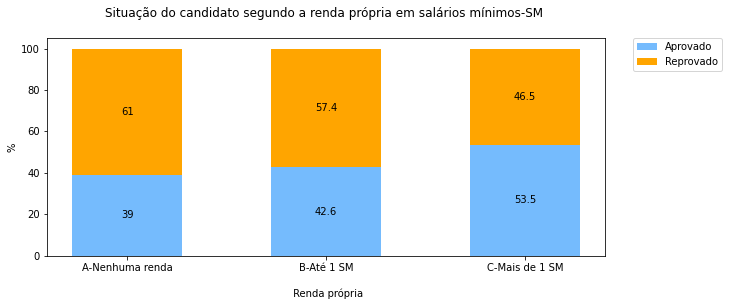

In [81]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Nenhuma renda','B-Até 1 SM','C-Mais de 1 SM']

N = len(labels)

aprovados_tabQ07=cros_tabQ07['% Aprovado'].head(len(cros_tabQ07['% Aprovado'])-1)
reprovados_tabQ07=cros_tabQ07['% Reprovado'].head(len(cros_tabQ07['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ07, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ07, width,
            bottom=aprovados_tabQ07, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo a renda própria em salários mínimos-SM \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Renda própria')
plt.savefig('graficos/Q07.png', format='png')
plt.show()


In [82]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ07['Aprovado'], cros_tabQ07['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1895.1
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  3

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1888.88
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  3

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.7.1 Teste de hipótese para verificar a existência de relação entre a renda familiar e a renda própria

In [83]:
# Tabela de frequências cruzadas entre a renda própria e a renda familiar para o teste Qui-quadrado:

cros_tabQ07t=pd.crosstab(dados['Q07'], dados['Q06'], 
                      margins=True, margins_name='Total',rownames=['Renda própria'],colnames=['Renda familiar'])

print(cros_tabQ07t)

# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência


obs = np.array([cros_tabQ07t['A-Até 1 SM'], cros_tabQ07t['B-Mais de 1 SM'] ])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  

Renda familiar   A-Até 1 SM  B-Mais de 1 SM   Total
Renda própria                                      
A-Nenhuma renda       28671           21652   50323
B-Até 1 SM            38326           19317   57643
C-Mais de 1 SM         1423           35368   36791
Total                 68420           76337  144757

 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  38248.19
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  3

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  45892.82
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  3

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.8) Análise do atributo Q08


In [84]:
# Criando a tabela de distribuição de frequências

tabQ08 = pd.value_counts(dados['Q08']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ08['%'] = round(100*pd.value_counts(dados['Q08']) / len(dados['Q08']),3)
tabQ08_total = pd.DataFrame(np.array(tabQ08.sum()).reshape(1,2), index=['Total'], columns=tabQ08.columns)
tabQ08_total['Candidatos'] =int(tabQ08_total['Candidatos'])
tabQ08_tabela = tabQ08.append(tabQ08_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q08)
tabQ08_tabela.to_excel('tabelas/tabelaQ08.xlsx',index=True,index_label='Trabalha ou já trabalhou')

tabQ08_tabela


Distribuição do número de candidatos em relação a pergunta 
 Você trabalha ou já trabalhou?


Candidatos        %
A-Sim       99589   68.797
B-Não       45168   31.203
Total      144757  100.000

In [85]:
# Criando a tabela cruzada target vs Q08

cros_tabQ08=pd.crosstab(dados['Q08'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Trabalha ou já trabalhou'],colnames=['Situação:'])

cros_tabQ08['% Aprovado']=round(100*(cros_tabQ08['Aprovado']/cros_tabQ08['Total']),1)
cros_tabQ08['% Reprovado']=round(100*(cros_tabQ08['Reprovado']/cros_tabQ08['Total']),1)

cros_tabQ08["% Total"]=100*round((cros_tabQ08["Total"]/len(dados)),3)
cros_tabQ08 = cros_tabQ08[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação ao trabalho')
cros_tabQ08.to_excel('tabelas/tabelaQ08a.xlsx',index=True,index_label='Trabalha ou já trabalhou')

cros_tabQ08

Situação em relação ao trabalho


Situação:                 Aprovado  Reprovado  % Aprovado  % Reprovado  \
Trabalha ou já trabalhou                                                 
A-Sim                        47954      51635        48.2         51.8   
B-Não                        15905      29263        35.2         64.8   
Total                        63859      80898        44.1         55.9   

Situação:                  Total  % Total  
Trabalha ou já trabalhou                   
A-Sim                      99589     68.8  
B-Não                      45168     31.2  
Total                     144757    100.0

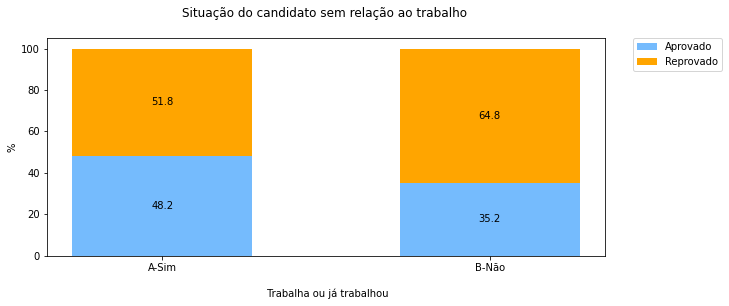

In [86]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Sim','B-Não']

N = len(labels)

aprovados_tabQ08=cros_tabQ08['% Aprovado'].head(len(cros_tabQ08['% Aprovado'])-1)
reprovados_tabQ08=cros_tabQ08['% Reprovado'].head(len(cros_tabQ08['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ08, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ08, width,
            bottom=aprovados_tabQ08, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato sem relação ao trabalho \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Trabalha ou já trabalhou')
plt.savefig('graficos/Q08.png', format='png')
plt.show()


In [87]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ08['Aprovado'], cros_tabQ08['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2110.17
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  2136.01
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.9) Análise do atributo Q18

In [88]:
# Criando a tabela de distribuição de frequências

tabQ18 = pd.value_counts(dados['Q18']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ18['%'] = round(100*pd.value_counts(dados['Q18']) / len(dados['Q18']),3)
tabQ18_total = pd.DataFrame(np.array(tabQ18.sum()).reshape(1,2), index=['Total'], columns=tabQ18.columns)
tabQ18_total['Candidatos'] =int(tabQ18_total['Candidatos'])
tabQ18_tabela = tabQ18.append(tabQ18_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q18)
tabQ18_tabela.to_excel('tabelas/tabelaQ18.xlsx',index=True,index_label='Já reprovou na escola')

tabQ18_tabela

Distribuição do número de candidatos em relação a pergunta 
 Você já reprovou alguma vez?


Candidatos        %
A-Nenhuma vez              40919   28.267
B-Uma vez                  39614   27.366
C-Duas vezes               32376   22.366
D-Três vezes ou mais       31848   22.001
Total                     144757  100.000

In [89]:
# Criando a tabela cruzada target vs Q18

cros_tabQ18=pd.crosstab(dados['Q18'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Já reprovou na escola'],colnames=['Situação:'])

cros_tabQ18['% Aprovado']=round(100*(cros_tabQ18['Aprovado']/cros_tabQ18['Total']),1)
cros_tabQ18['% Reprovado']=round(100*(cros_tabQ18['Reprovado']/cros_tabQ18['Total']),1)

cros_tabQ18["% Total"]=100*round((cros_tabQ18["Total"]/len(dados)),3)
cros_tabQ18 = cros_tabQ18[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação à reprovação na escola')
cros_tabQ18.to_excel('tabelas/tabelaQ18b.xlsx',index=True,index_label='Reprovações na escola')

cros_tabQ18

Situação em relação à reprovação na escola


Situação:              Aprovado  Reprovado  % Aprovado  % Reprovado   Total  \
Já reprovou na escola                                                         
A-Nenhuma vez             19447      21472        47.5         52.5   40919   
B-Uma vez                 18414      21200        46.5         53.5   39614   
C-Duas vezes              13736      18640        42.4         57.6   32376   
D-Três vezes ou mais      12262      19586        38.5         61.5   31848   
Total                     63859      80898        44.1         55.9  144757   

Situação:              % Total  
Já reprovou na escola           
A-Nenhuma vez             28.3  
B-Uma vez                 27.4  
C-Duas vezes              22.4  
D-Três vezes ou mais      22.0  
Total                    100.0

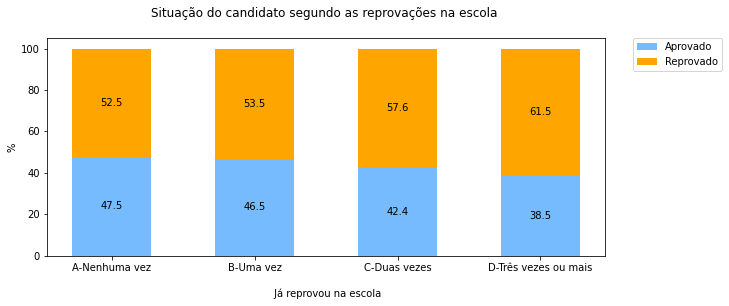

In [90]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Nenhuma vez','B-Uma vez', 'C-Duas vezes', 'D-Três vezes ou mais']

N = len(labels)

aprovados_tabQ18=cros_tabQ18['% Aprovado'].head(len(cros_tabQ18['% Aprovado'])-1)
reprovados_tabQ18=cros_tabQ18['% Reprovado'].head(len(cros_tabQ18['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ18, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ18, width,
            bottom=aprovados_tabQ18, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo as reprovações na escola \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Já reprovou na escola')
plt.savefig('graficos/Q18.png', format='png')
plt.show()


In [91]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ18['Aprovado'], cros_tabQ18['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  727.7
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  731.2
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.10) Análise do atributo Q19

In [92]:
# Criando a tabela de distribuição de frequências

tabQ19 = pd.value_counts(dados['Q19']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ19['%'] = round(100*pd.value_counts(dados['Q19']) / len(dados['Q19']),3)
tabQ19_total = pd.DataFrame(np.array(tabQ19.sum()).reshape(1,2), index=['Total'], columns=tabQ19.columns)
tabQ19_total['Candidatos'] =int(tabQ19_total['Candidatos'])
tabQ19_tabela = tabQ19.append(tabQ19_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q19)
tabQ19_tabela.to_excel('tabelas/tabelaQ19.xlsx',index=True,index_label='Motivo principal')

tabQ19_tabela


Distribuição do número de candidatos em relação a pergunta 
 Qual principal motivo faria você voltar a estudar ou continuar estudando?


Candidatos        %
A-Conseguir um emprego                                   48060   33.200
B-Progredir no emprego atual                             13626    9.413
C-Conseguir um emprego melhor                            44243   30.564
D-Adquirir mais conhecimento, ficar atualizado           32422   22.398
E-Atender à expectativa de meus familiares sobr...        5425    3.748
F-Não pretendo voltar a estudar                            981    0.678
Total                                                   144757  100.001

In [93]:
# Agregando categorias

dados['Q19']=dados['Q19'].replace(['A-Conseguir um emprego','B-Progredir no emprego atual',
                                   'C-Conseguir um emprego melhor','D-Adquirir mais conhecimento, ficar atualizado',
                                   'E-Atender à expectativa de meus familiares sobre meus estudos',
                                   'F-Não pretendo voltar a estudar' ],
                                  ['A','D','B','C','D','D'])

mapper_Q19 = {'A': 'A-Conseguir um emprego', 'B': 'B-Conseguir um emprego melhor', 'C': 'C-Adquirir conhecimento',
              'D': 'D-Outro motivo'}

dados['Q19'] = dados['Q19'].map(mapper_Q19).fillna(dados['Q19'])


In [94]:
# Criando a tabela de distribuição de frequências

tabQ19 = pd.value_counts(dados['Q19']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ19['%'] = round(100*pd.value_counts(dados['Q19']) / len(dados['Q19']),3)
tabQ19_total = pd.DataFrame(np.array(tabQ19.sum()).reshape(1,2), index=['Total'], columns=tabQ19.columns)
tabQ19_total['Candidatos'] =int(tabQ19_total['Candidatos'])
tabQ19_tabela = tabQ19.append(tabQ19_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q19)
tabQ19_tabela.to_excel('tabelas/tabelaQ19a.xlsx',index=True,index_label='Motivo principal')

tabQ19_tabela

Distribuição do número de candidatos em relação a pergunta 
 Qual principal motivo faria você voltar a estudar ou continuar estudando?


Candidatos        %
A-Conseguir um emprego              48060   33.200
B-Conseguir um emprego melhor       44243   30.564
C-Adquirir conhecimento             32422   22.398
D-Outro motivo                      20032   13.838
Total                              144757  100.000

In [95]:
# Criando a tabela cruzada target vs Q19

cros_tabQ19=pd.crosstab(dados['Q19'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Motivo principal'],colnames=['Situação:'])

cros_tabQ19['% Aprovado']=round(100*(cros_tabQ19['Aprovado']/cros_tabQ19['Total']),1)
cros_tabQ19['% Reprovado']=round(100*(cros_tabQ19['Reprovado']/cros_tabQ19['Total']),1)

cros_tabQ19["% Total"]=100*round((cros_tabQ19["Total"]/len(dados)),3)
cros_tabQ19 = cros_tabQ19[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]


print('Situação em relação ao principal motivo para voltar a estudar \n')
cros_tabQ19.to_excel('tabelas/tabelaQ19a.xlsx',index=True,index_label='Motivo principal')

cros_tabQ19


Situação em relação ao principal motivo para voltar a estudar 



Situação:                      Aprovado  Reprovado  % Aprovado  % Reprovado  \
Motivo principal                                                              
A-Conseguir um emprego            18700      29360        38.9         61.1   
B-Conseguir um emprego melhor     21078      23165        47.6         52.4   
C-Adquirir conhecimento           15029      17393        46.4         53.6   
D-Outro motivo                     9052      10980        45.2         54.8   
Total                             63859      80898        44.1         55.9   

Situação:                       Total  % Total  
Motivo principal                                
A-Conseguir um emprego          48060     33.2  
B-Conseguir um emprego melhor   44243     30.6  
C-Adquirir conhecimento         32422     22.4  
D-Outro motivo                  20032     13.8  
Total                          144757    100.0

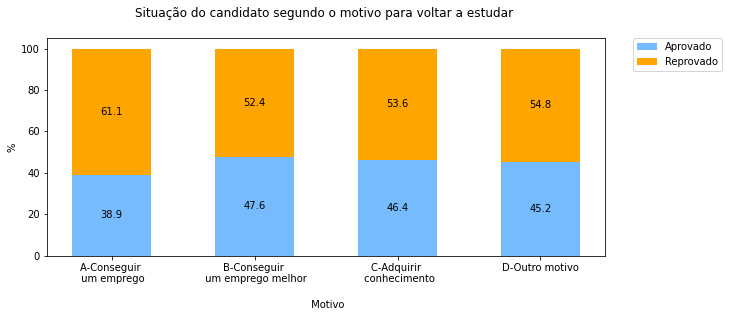

In [96]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Conseguir \n um emprego','B-Conseguir \n um emprego melhor', 'C-Adquirir \n conhecimento' ,
          'D-Outro motivo']

N = len(labels)

aprovados_tabQ19=cros_tabQ19['% Aprovado'].head(len(cros_tabQ19['% Aprovado'])-1)
reprovados_tabQ19=cros_tabQ19['% Reprovado'].head(len(cros_tabQ19['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ19, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ19, width,
            bottom=aprovados_tabQ19, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo o motivo para voltar a estudar \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Motivo')
plt.savefig('graficos/Q19.png', format='png')
plt.show()



In [97]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ19['Aprovado'], cros_tabQ19['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  826.66
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  830.81
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.11) Análise do atributo Q20

In [98]:
# Criando a tabela de distribuição de frequências

tabQ20 = pd.value_counts(dados['Q20']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ20['%'] = round(100*pd.value_counts(dados['Q20']) / len(dados['Q20']),3)
tabQ20_total = pd.DataFrame(np.array(tabQ20.sum()).reshape(1,2), index=['Total'], columns=tabQ20.columns)
tabQ20_total['Candidatos'] =int(tabQ20_total['Candidatos'])
tabQ20_tabela = tabQ20.append(tabQ20_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q20)
tabQ20_tabela.to_excel('tabelas/tabelaQ20.xlsx',index=True,index_label='Série que deixou de frequentar')

tabQ20_tabela

Distribuição do número de candidatos em relação a pergunta 
 Se você já frequentou a escola regular, em que série você deixou de estudar?


Candidatos       %
A-Não frequentei                        2850   1.969
B-1ª série do ensino fundamental        1820   1.257
C-2ª série do ensino fundamental        1277   0.882
D-3ª série do ensino fundamental        3204   2.213
E-4ª série do ensino fundamental       14343   9.908
F-5ª série do ensino fundamental       24948  17.234
G-6ªsérie do ensino fundamental        27581  19.053
H-7ª série do ensino fundamental       34293  23.690
I-8ª série do ensino fundamental       34441  23.792
Total                                 144757  99.998

In [99]:
# Agregando categorias

dados['Q20']=dados['Q20'].replace(['A-Não frequentei','B-1ª série do ensino fundamental',
                                   'C-2ª série do ensino fundamental','D-3ª série do ensino fundamental',
                                   'E-4ª série do ensino fundamental','F-5ª série do ensino fundamental',
                                  'G-6ªsérie do ensino fundamental','H-7ª série do ensino fundamental',
                                   'I-8ª série do ensino fundamental'],
                                  ['A','A','A','A','A','B','C','D','E'])

mapper_Q20 = {'A': 'A-4ª série ou antes', 'B': 'B-5ª série', 'C': 'C-6ª série', 'D': 'D-7ª série','E': 'E-8ª série'}

dados['Q20'] = dados['Q20'].map(mapper_Q20).fillna(dados['Q20'])

In [100]:
# Criando a tabela de distribuição de frequências

tabQ20 = pd.value_counts(dados['Q20']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ20['%'] = round(100*pd.value_counts(dados['Q20']) / len(dados['Q20']),3)
tabQ20_total = pd.DataFrame(np.array(tabQ20.sum()).reshape(1,2), index=['Total'], columns=tabQ20.columns)
tabQ20_total['Candidatos'] =int(tabQ20_total['Candidatos'])
tabQ20_tabela = tabQ20.append(tabQ20_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q20)
tabQ20_tabela.to_excel('tabelas/tabelaQ20a.xlsx',index=True,index_label='Série que deixou de frequentar')

tabQ20_tabela

Distribuição do número de candidatos em relação a pergunta 
 Se você já frequentou a escola regular, em que série você deixou de estudar?


Candidatos       %
A-4ª série ou antes       23494  16.230
B-5ª série                24948  17.234
C-6ª série                27581  19.053
D-7ª série                34293  23.690
E-8ª série                34441  23.792
Total                    144757  99.999

In [101]:
# Criando a tabela cruzada target vs Q20

cros_tabQ20=pd.crosstab(dados['Q20'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Série que deixou de frequentar'],colnames=['Situação:'])

cros_tabQ20['% Aprovado']=round(100*(cros_tabQ20['Aprovado']/cros_tabQ20['Total']),1)
cros_tabQ20['% Reprovado']=round(100*(cros_tabQ20['Reprovado']/cros_tabQ20['Total']),1)

cros_tabQ20["% Total"]=100*round((cros_tabQ20["Total"]/len(dados)),3)
cros_tabQ20 = cros_tabQ20[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação à série que deixou de estudar \n')
cros_tabQ20.to_excel('tabelas/tabelaQ20b.xlsx',index=True,index_label='Série que deixou de estudar')

cros_tabQ20

Situação em relação à série que deixou de estudar 



Situação:                       Aprovado  Reprovado  % Aprovado  % Reprovado  \
Série que deixou de frequentar                                                 
A-4ª série ou antes                 8349      15145        35.5         64.5   
B-5ª série                         10312      14636        41.3         58.7   
C-6ª série                         12312      15269        44.6         55.4   
D-7ª série                         15991      18302        46.6         53.4   
E-8ª série                         16895      17546        49.1         50.9   
Total                              63859      80898        44.1         55.9   

Situação:                        Total  % Total  
Série que deixou de frequentar                   
A-4ª série ou antes              23494     16.2  
B-5ª série                       24948     17.2  
C-6ª série                       27581     19.1  
D-7ª série                       34293     23.7  
E-8ª série                       34441     23.8  
Total                           144757    100.0

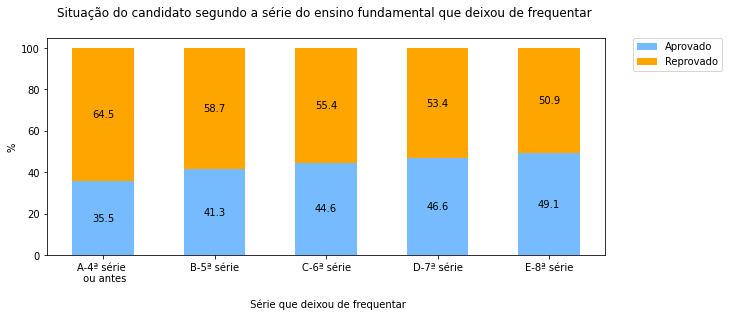

In [102]:
# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-4ª série \n ou antes', 'B-5ª série', 'C-6ª série', 'D-7ª série','E-8ª série']



N = len(labels)

aprovados_tabQ20=cros_tabQ20['% Aprovado'].head(len(cros_tabQ20['% Aprovado'])-1)
reprovados_tabQ20=cros_tabQ20['% Reprovado'].head(len(cros_tabQ20['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ20, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ20, width,
            bottom=aprovados_tabQ20, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato segundo a série do ensino fundamental que deixou de frequentar \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Série que deixou de frequentar')
plt.savefig('graficos/Q20.png', format='png')
plt.show()


In [103]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ20['Aprovado'], cros_tabQ20['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1211.52
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  5

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1222.98
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  5

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.12) Análise do atributo Q21

In [104]:
# Criando a tabela de distribuição de frequências

tabQ21 = pd.value_counts(dados['Q21']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ21['%'] = round(100*pd.value_counts(dados['Q21']) / len(dados['Q21']),3)
tabQ21_total = pd.DataFrame(np.array(tabQ21.sum()).reshape(1,2), index=['Total'], columns=tabQ21.columns)
tabQ21_total['Candidatos'] =int(tabQ21_total['Candidatos'])
tabQ21_tabela = tabQ21.append(tabQ21_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q21)
tabQ21_tabela.to_excel('tabelas/tabelaQ21.xlsx',index=True,index_label='Idade quando deixou de frequentar')

tabQ21_tabela

Distribuição do número de candidatos em relação a pergunta 
 Se você deixou de frequentar a escola regular, quantos anos você tinha?


Candidatos        %
A-Nunca frequentei a escola          1233    0.852
B-Estou frequentando a escola       17638   12.185
C-Menos de 10 anos                   4049    2.797
D-Entre 10 e 14 anos                40756   28.155
E-Entre 15 e 18 anos                65471   45.228
F-Entre 19 e 24 anos                10453    7.221
G-Entre 25 e 30 anos                 2960    2.045
H-Mais de 30 anos                    2197    1.518
Total                              144757  100.001

In [105]:
# Agregando categorias

dados['Q21']=dados['Q21'].replace(['A-Nunca frequentei a escola','B-Estou frequentando a escola',
                                   'C-Menos de 10 anos','D-Entre 10 e 14 anos',
                                   'E-Entre 15 e 18 anos','F-Entre 19 e 24 anos',
                                   'G-Entre 25 e 30 anos','H-Mais de 30 anos'], ['A','A','B','B','C','D','D','D'])

mapper_Q21 = {'A': 'A-Não deixou de frequentar', 'B': 'B-Menos de 15 anos', 'C': 'C-Entre 15 e 18 anos',
              'D': 'D-Mais de 18 anos'}

dados['Q21'] = dados['Q21'].map(mapper_Q21).fillna(dados['Q21'])


In [106]:
# Criando a tabela de distribuição de frequências

tabQ21 = pd.value_counts(dados['Q21']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ21['%'] = round(100*pd.value_counts(dados['Q21']) / len(dados['Q21']),2)
tabQ21_total = pd.DataFrame(np.array(tabQ21.sum()).reshape(1,2), index=['Total'], columns=tabQ21.columns)
tabQ21_total['Candidatos'] =int(tabQ21_total['Candidatos'])
tabQ21_tabela = tabQ21.append(tabQ21_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q21)
tabQ21_tabela.to_excel('tabelas/tabelaQ21a.xlsx',index=True,index_label='Idade quando deixou de frequentar')

tabQ21_tabela

Distribuição do número de candidatos em relação a pergunta 
 Se você deixou de frequentar a escola regular, quantos anos você tinha?


Candidatos       %
A-Não deixou de frequentar       18871   13.04
B-Menos de 15 anos               44805   30.95
C-Entre 15 e 18 anos             65471   45.23
D-Mais de 18 anos                15610   10.78
Total                           144757  100.00

In [107]:
# Criando a tabela cruzada target vs Q21

cros_tabQ21=pd.crosstab(dados['Q21'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Idade quando deixou de frequentar'],colnames=['Situação:'])

cros_tabQ21['% Aprovado']=round(100*(cros_tabQ21['Aprovado']/cros_tabQ21['Total']),1)
cros_tabQ21['% Reprovado']=round(100*(cros_tabQ21['Reprovado']/cros_tabQ21['Total']),1)

cros_tabQ21["% Total"]=100*round((cros_tabQ21["Total"]/len(dados)),3)
cros_tabQ21 = cros_tabQ21[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]

print('Situação em relação à idade quando deixou de frequentar a escola \n')
cros_tabQ21.to_excel('tabelas/tabelaQ21b.xlsx',index=True,index_label='Idade quando deixou de estudar')

cros_tabQ21



Situação em relação à idade quando deixou de frequentar a escola 



Situação:                          Aprovado  Reprovado  % Aprovado  \
Idade quando deixou de frequentar                                    
A-Não deixou de frequentar             5919      12952        31.4   
B-Menos de 15 anos                    20333      24472        45.4   
C-Entre 15 e 18 anos                  31055      34416        47.4   
D-Mais de 18 anos                      6552       9058        42.0   
Total                                 63859      80898        44.1   

Situação:                          % Reprovado   Total  % Total  
Idade quando deixou de frequentar                                
A-Não deixou de frequentar                68.6   18871     13.0  
B-Menos de 15 anos                        54.6   44805     31.0  
C-Entre 15 e 18 anos                      52.6   65471     45.2  
D-Mais de 18 anos                         58.0   15610     10.8  
Total                                     55.9  144757    100.0

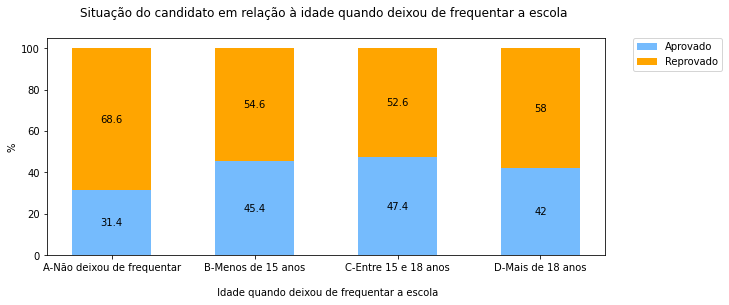

In [108]:

# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

mapper_Q21 = {'A': 'A-Não deixou de frequentar', 'B': 'B-Menos de 15 anos', 'C': 'C-Entre 15 e 18 anos',
              'D': 'D-Mais de 18 anos'}


labels = ['A-Não deixou de frequentar','B-Menos de 15 anos','C-Entre 15 e 18 anos','D-Mais de 18 anos']

N = len(labels)

aprovados_tabQ21=cros_tabQ21['% Aprovado'].head(len(cros_tabQ21['% Aprovado'])-1)
reprovados_tabQ21=cros_tabQ21['% Reprovado'].head(len(cros_tabQ21['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ21, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ21, width,
            bottom=aprovados_tabQ21, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato em relação à idade quando deixou de frequentar a escola \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Idade quando deixou de frequentar a escola')
plt.savefig('graficos/Q21.png', format='png')
plt.show()


In [109]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ21['Aprovado'], cros_tabQ21['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1594.79
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  1634.73
 O P-Valor do teste é:  0.0
 O número de graus de liberdade é:  4

 Resultado: Há relação de dependência ao nível de 5% de significância


#### 2.7.13) Análise do atributo Q31

In [110]:
# Criando a tabela de distribuição de frequências

tabQ31 = pd.value_counts(dados['Q31']).to_frame(name='Candidatos').rename_axis('Situação').sort_index()
tabQ31['%'] = round(100*pd.value_counts(dados['Q31']) / len(dados['Q31']),3)
tabQ31_total = pd.DataFrame(np.array(tabQ31.sum()).reshape(1,2), index=['Total'], columns=tabQ31.columns)
tabQ31_total['Candidatos'] =int(tabQ31_total['Candidatos'])
tabQ31_tabela = tabQ31.append(tabQ31_total)
print("Distribuição do número de candidatos em relação a pergunta \n", nome_Q31)
tabQ31_tabela.to_excel('tabelas/tabelaQ31.xlsx',index=True,index_label='Cursa ou já cursou EJA')

tabQ31_tabela

Distribuição do número de candidatos em relação a pergunta 
 Você cursa ou já cursou a Educação de Jovens e Adultos EJA?


Candidatos        %
A-Sim       46179   31.901
B-Não       98578   68.099
Total      144757  100.000

In [111]:
# Criando a tabela cruzada target vs Q31

cros_tabQ31=pd.crosstab(dados['Q31'],dados['target'], 
                      margins=True, margins_name='Total',rownames=['Cursa ou já cursou EJA'],colnames=['Situação:'])

cros_tabQ31['% Aprovado']=round(100*(cros_tabQ31['Aprovado']/cros_tabQ31['Total']),1)
cros_tabQ31['% Reprovado']=round(100*(cros_tabQ31['Reprovado']/cros_tabQ31['Total']),1)

cros_tabQ31["% Total"]=100*round((cros_tabQ31["Total"]/len(dados)),3)
cros_tabQ31 = cros_tabQ31[['Aprovado']+['Reprovado']+['% Aprovado']+['% Reprovado']+['Total']+['% Total']]


print('Situação em relação ao EJA \n')
cros_tabQ31.to_excel('tabelas/tabelaQ31a.xlsx',index=True,index_label='Cursa ou já cursou EJA')

cros_tabQ31

Situação em relação ao EJA 



Situação:               Aprovado  Reprovado  % Aprovado  % Reprovado   Total  \
Cursa ou já cursou EJA                                                         
A-Sim                      20723      25456        44.9         55.1   46179   
B-Não                      43136      55442        43.8         56.2   98578   
Total                      63859      80898        44.1         55.9  144757   

Situação:               % Total  
Cursa ou já cursou EJA           
A-Sim                      31.9  
B-Não                      68.1  
Total                     100.0

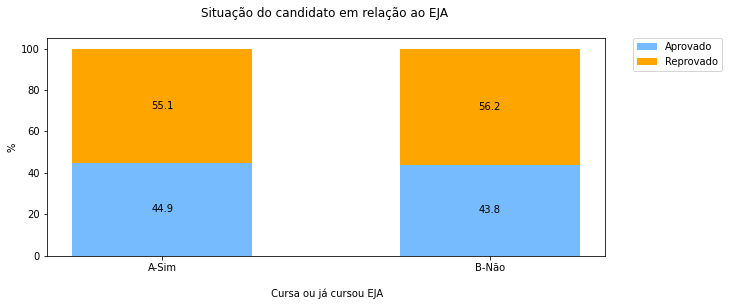

In [112]:

# Gerando o gráfico comparativo

plt.rcParams['figure.figsize'] = (10,4)

labels = ['A-Sim','B-Não']

N = len(labels)

aprovados_tabQ31=cros_tabQ31['% Aprovado'].head(len(cros_tabQ31['% Aprovado'])-1)
reprovados_tabQ31=cros_tabQ31['% Reprovado'].head(len(cros_tabQ31['% Reprovado'])-1)

ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, aprovados_tabQ31, width, label='Aprovado',color='xkcd:sky blue')
p2 = ax.bar(ind, reprovados_tabQ31, width,
            bottom=aprovados_tabQ31, label='Reprovado', color='orange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('%')
ax.set_title('Situação do candidato em relação ao EJA \n')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('\n Cursa ou já cursou EJA')
plt.savefig('graficos/Q31.png', format='png')
plt.show()


In [113]:
# Teste Qui-quadrado

# H0: Não há relação de dependência
# H1: Há relação de dependência

obs = np.array([cros_tabQ31['Aprovado'], cros_tabQ31['Reprovado']])

g, p, dof, expctd = chi2_contingency(obs)

print("\n Teste de Qui-Quadrado utilizando Pearson")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  


g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")

print("\n \n Teste de Qui-Quadrado utilizando a função de verossimilhança")
print("\n Hipóteses:")
print("\n H0: Não há relação de dependência")
print(" H1: Há relação de dependência")
print("\n O valor do qui-quadrado calculado é: ", round(g,2))
print(" O P-Valor do teste é: ", round(p,5))
print(" O número de graus de liberdade é: ", dof)

if p > 0.05:
    print("\n Resultado: Estatisticamente não há evidência de dependência ao nível de 5% de significância")
else:
    print("\n Resultado: Há relação de dependência ao nível de 5% de significância")  



 Teste de Qui-Quadrado utilizando Pearson

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  15.92
 O P-Valor do teste é:  0.00035
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância

 
 Teste de Qui-Quadrado utilizando a função de verossimilhança

 Hipóteses:

 H0: Não há relação de dependência
 H1: Há relação de dependência

 O valor do qui-quadrado calculado é:  15.91
 O P-Valor do teste é:  0.00035
 O número de graus de liberdade é:  2

 Resultado: Há relação de dependência ao nível de 5% de significância


### Gerando base de dados após todas as análises

In [114]:
# Excluindo atributos que não serão utilizados nos modelos

del dados['NU_INSCRICAO']
del dados['NU_IDADE']
del dados['SG_UF_PROVA']
del dados['IN_APROVADO_LC']
del dados['IN_APROVADO_CN']
del dados['IN_APROVADO_MT']
del dados['IN_APROVADO_CH']
del dados['homicidios']
del dados['Populacao']
del dados['taxapor100mil']
del dados['idhm_2017']
del dados['y']
del dados['Q06']

In [115]:
# Renomeando as variáveis

dados.rename(columns={'TP_SEXO': 'genero'}, inplace = True)
dados.rename(columns={'taxapor100milcat': 'taxa_homicidios'}, inplace = True)
dados.rename(columns={'idhm_2017_cat': 'idhm'}, inplace = True)
dados.rename(columns={'Q01': 'moradia_pessoas'}, inplace = True)
dados.rename(columns={'Q02': 'moradia_tipo'}, inplace = True)
dados.rename(columns={'Q03': 'moradia_local'}, inplace = True)
dados.rename(columns={'Q04': 'escolaridade_pai'}, inplace = True)
dados.rename(columns={'Q05': 'escolaridade_mae'}, inplace = True)
dados.rename(columns={'Q07': 'renda_propria'}, inplace = True)
dados.rename(columns={'Q08': 'trabalha'}, inplace = True)
dados.rename(columns={'Q18': 'reprovou'}, inplace = True)
dados.rename(columns={'Q19': 'motivo_estudo'}, inplace = True)
dados.rename(columns={'Q20': 'serie_estudo'}, inplace = True)
dados.rename(columns={'Q21': 'idade_estudo'}, inplace = True)
dados.rename(columns={'Q31': 'eja'}, inplace = True)

print("\nDimensões: {0}".format(dados.shape))
print("\nCampos: {0}".format(dados.keys()))


Dimensões: (144757, 18)

Campos: Index(['genero', 'moradia_pessoas', 'moradia_tipo', 'moradia_local',
       'escolaridade_pai', 'escolaridade_mae', 'renda_propria', 'trabalha',
       'reprovou', 'motivo_estudo', 'serie_estudo', 'idade_estudo', 'eja',
       'target', 'faixa_etaria', 'taxa_homicidios', 'idhm', 'regiao'],
      dtype='object')


In [116]:
# Colocando o atributo target no final da base de dados

dados = dados[[ col for col in dados.columns if col != 'target' ]+['target']]

print("\nDimensões: {0}".format(dados.shape))
print("\nCampos: {0}".format(dados.keys()))


Dimensões: (144757, 18)

Campos: Index(['genero', 'moradia_pessoas', 'moradia_tipo', 'moradia_local',
       'escolaridade_pai', 'escolaridade_mae', 'renda_propria', 'trabalha',
       'reprovou', 'motivo_estudo', 'serie_estudo', 'idade_estudo', 'eja',
       'faixa_etaria', 'taxa_homicidios', 'idhm', 'regiao', 'target'],
      dtype='object')


In [117]:
# Salvando os dados

dados.to_csv('04-dados_apos_analise/dados_apos_analise.csv',index=False, encoding = "ISO-8859-1")
